<a href="https://colab.research.google.com/github/BharatSingla12/Retail_Customer_Segmentation/blob/main/Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font size="+3" color='#cc0707'><b><u> Retail Customer Segmentation </u>
<font size="+1" color='#144c5c'><b>  Customer segmentation is very important because it helps market and sell products more effectively. It helps to develop a better understanding of your customer's needs and desires. Effective customer segmentation will help to increase customer lifetime value and increase their spending. 

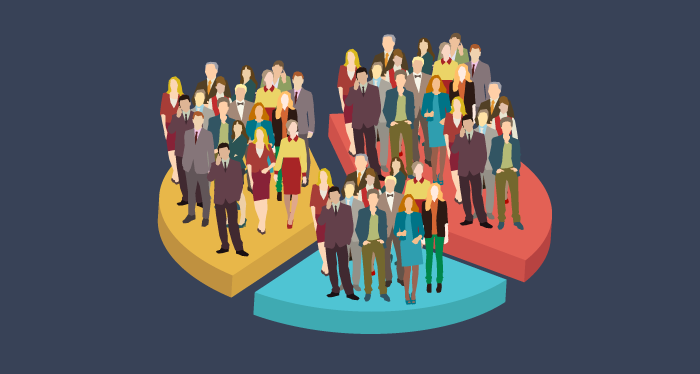

 <a href="https://onedrive.live.com/view.aspx?resid=C387FF99405739E7!3768&ithint=file%2cpptx&authkey=!AP6skmT41Vd4yOA" target="_blank"> <font size="+2" color='#cc0707'><b> Click here to watch the Persentation  </b> </a>    📊 

##   <font size="+2.5" color='#144c5c'><b><u> Project Description </u>



### <b> Problem Description </b>
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### <b>  Data Description </b> </font>

<table>
  <tr>
    <th><strong><b>Feature</b></strong></th>
    <th><strong><b>Description</b></strong></th>
  </tr>
  <tr>
    <td>InvoiceNo</td>
    <td>Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.</td>
  </tr>
  <tr>
    <td>StockCode</td>
    <td>Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.</td>
  </tr>
  <tr>
    <td>Description</td>
    <td>Product (item) name. Nominal.</td>
  </tr>
  <tr>
    <td>Quantity</td>
    <td>The quantities of each product (item) per transaction. Numeric.</td>
  </tr>
  <tr>
    <td>InvoiceDate</td>
    <td>Invoice Date and time. Numeric, the day and time when each transaction was generated.</td>
  </tr>
  <tr>
    <td>UnitPrice</td>
    <td>Unit price. Numeric, Product price per unit in sterling.</td>
  </tr>
  <tr>
    <td>CustomerID</td>
    <td>Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.</td>
  </tr>
  <tr>
    <td>Country</td>
    <td>Country name. Nominal, the name of the country where each customer resides.</td>
  </tr>
</table>

## <font size="+2.5" color='#144c5c'><b>  <u>Exploratory data analysis</u>

### Importing all the libraries

In [1]:
!pip install squarify
!pip install downcast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importing all the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import datetime as dt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, ward,linkage
from IPython.display import Markdown, display
from sklearn.cluster import DBSCAN

In [3]:
import os
import datetime
import squarify
import warnings
import pandas as pd 
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot

In [4]:
# To ignore irrelevent warnigns 
import warnings
warnings.filterwarnings('ignore')

# Plot setting 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

### Lets understand the Data 

In [5]:
# Load the data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1j-sNUmFzBYOqixfwhJA75hCDbeWG-7lG',encoding= 'unicode_escape')

# View it 
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [6]:
# Check the shape of the data
df.shape

(541909, 8)

In [7]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# Print all the columns present in the data
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
# Get the descriptive statistics
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [10]:
# Lets check for the unique value in each column
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### Lets clean the Data

In [11]:
# Get the Percentage of the missing values in each column
100*df.isna().sum()/len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

From above, about 25% of Customer IDs are missing and without Customer IDs it make no sense, therefore it is good to delete rows in which customer ID is missing.

In [12]:
# Dropping the missing values from the Customer ID 
df = df.dropna(subset=['CustomerID'])

In [13]:
# Checking the number of the duplicate value in the dataset
df.duplicated().sum()

5225

In [14]:
# Dropping duplicate rows
df = df.drop_duplicates()

In [15]:
# Check the shape of the data
df.shape

(401604, 8)

In [16]:
# Checking the missing values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
# Determing % of orders canceled 
order_canceled  = 100*df['InvoiceNo'].str.contains('C').mean()
print(f'About {order_canceled} % of orders were canceled.')

About 2.209141343213713 % of orders were canceled.


In [18]:
# Dropping cancellations from the main dataframe
df = df[~df['InvoiceNo'].str.contains('C')]

In [19]:
# Converting the Invoice date to Date time datatype
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [20]:
# Change the customerIT type from float to int
df['CustomerID'] = df['CustomerID'].astype(int)

In [21]:
# Creating new features from the InvoiceDate
df["hour"]  = df["InvoiceDate"].dt.hour
df["day"]   = df["InvoiceDate"].dt.weekday # 0 for Monday
df["month"] = df["InvoiceDate"].dt.month
df["year"]  = df["InvoiceDate"].dt.year

In [22]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['revenue'] = df['Quantity']*df['UnitPrice']

In [23]:
# Lets view the data
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  hour  day  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom     8    2   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom     8    2   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom     8    2   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom     8    2   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom     8    2   

   month  year  revenue  
0     12  2010    15.30  
1     12  2010    20.34  
2     12  2010    22.00  
3     12  2010    20.34  
4     12  2010    20.34

In [24]:
# Lets view the data info now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
 8   hour         392732 non-null  int64         
 9   day          392732 non-null  int64         
 10  month        392732 non-null  int64         
 11  year         392732 non-null  int64         
 12  revenue      392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 41.9+ MB


In [25]:
# Install library to reduce the df size 
from downcast import reduce
# reduce the size of dataframe
df = reduce(df) 
# Lets view the data info now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  category      
 1   StockCode    392732 non-null  category      
 2   Description  392732 non-null  category      
 3   Quantity     392732 non-null  int32         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float16       
 6   CustomerID   392732 non-null  int16         
 7   Country      392732 non-null  category      
 8   hour         392732 non-null  int8          
 9   day          392732 non-null  int8          
 10  month        392732 non-null  int8          
 11  year         392732 non-null  int16         
 12  revenue      392732 non-null  float32       
dtypes: category(4), datetime64[ns](1), float16(1), float32(1), int16(2), int32(1), int8(3)
memory usage: 15.9 MB


### Data Analysis

#### Defining Functions

In [26]:
# Combine Distribution Plot
def VoBoSt_plot(DATA, Y= None, X = None):
    # Create violin plots without mini-boxplots inside.
    ax = sns.violinplot(y=Y, x=X, data=DATA, 
                        cut=0, inner=None)
    # Clip the right half of each violin.
    for item in ax.collections:
        x0, y0, width, height = item.get_paths()[0].get_extents().bounds
        item.set_clip_path(plt.Rectangle((x0, y0), width, height/2,
                        transform=ax.transData))

    # Create strip plots with partially transparent points of different colors depending on the group.
    num_items = len(ax.collections)
    sns.stripplot(y=Y, x=X, data=DATA, alpha=0.8, size=3,linewidth=0.07)

    # Shift each strip plot strictly below the correponding volin.
    for item in ax.collections[num_items:]:
        item.set_offsets(item.get_offsets() + 0.15)
    # Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
    sns.boxplot(y=Y, x=X, data=DATA, width=0.25,
                showfliers=True, showmeans=True, 
                meanprops=dict(marker='o', markerfacecolor='black',
                            markersize=6, zorder=3),
                boxprops=dict(facecolor=(0,0,0,0), 
                            linewidth=2, zorder=3),
                whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2),
                medianprops=dict(linewidth=2)) 


In [27]:
numerical_columns   = ['Quantity', 'UnitPrice', 'revenue']
categorical_columns = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']
datetime_columns    = ['InvoiceDate', 'hour', 'day', 'month', 'year']

#### Transaction Analysis

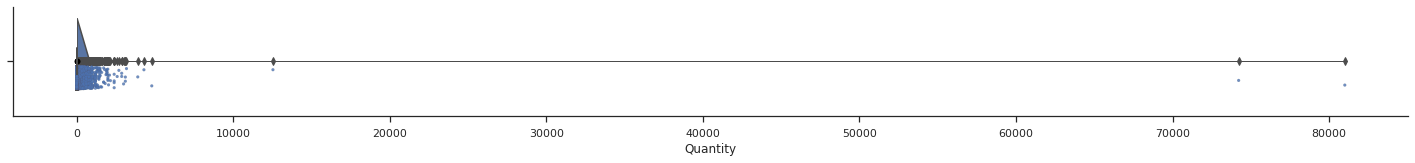

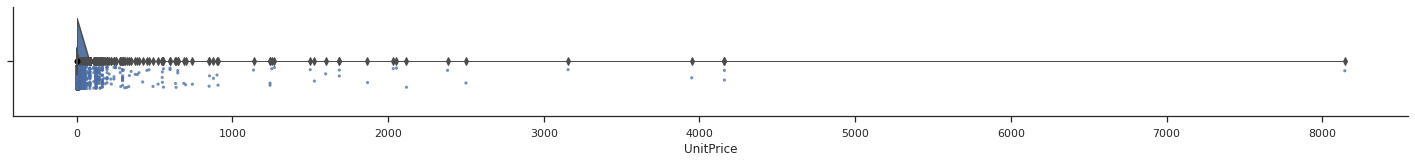

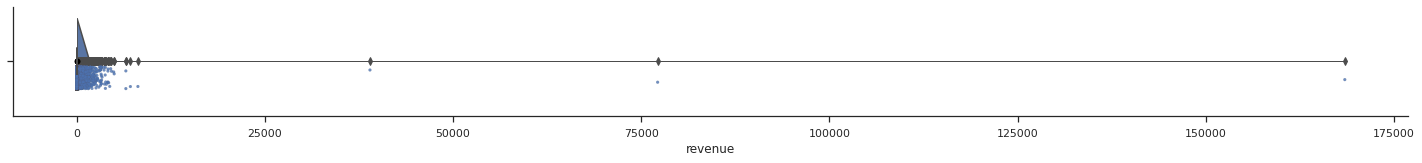

In [27]:
# Plot graph
numerical_columns   = ['Quantity', 'UnitPrice', 'revenue']
df_trans = df[numerical_columns].astype(np.float32)
for col in numerical_columns:
    plt.figure(figsize=(25,2))
    VoBoSt_plot(DATA = df_trans, X = col)
    plt.show()

In [28]:
(df_trans['Quantity']>10000).sum()

3

#### StockCode Analysis

In [29]:
# Create dataframe for stock code
df_stockcode = df['StockCode'].value_counts().reset_index().sort_values(by=["index"], ignore_index=True ) 
df_stockcode = df_stockcode.rename(columns={'index': 'Stock Code', 'StockCode':'Number of Transaction'})
df_stockcode['Total Quantity'] = df.groupby(['StockCode'], as_index = False)['Quantity'].sum()['Quantity']
df_stockcode['Total Revenue'] = df.groupby(['StockCode'], as_index = False)['revenue'].sum()['revenue']
df_stockcode['Average unit price'] = df.groupby(['StockCode'], as_index = False)['UnitPrice'].mean()['UnitPrice'].astype(np.float32)
df_stockcode.head()

Stock Code  Number of Transaction  Total Quantity  Total Revenue  \
0      10002                     49             823     699.549988   
1      10080                     21             291     114.409996   
2      10120                     29             192      40.320000   
3     10123C                      3               5       3.250000   
4     10124A                      5              16       6.720000   

   Average unit price  
0            0.850098  
1            0.411865  
2            0.209961  
3            0.649902  
4            0.419922

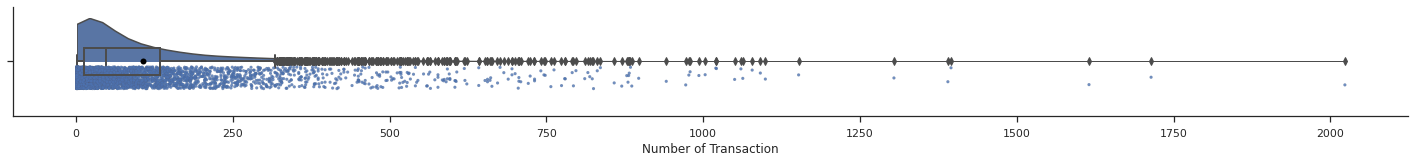

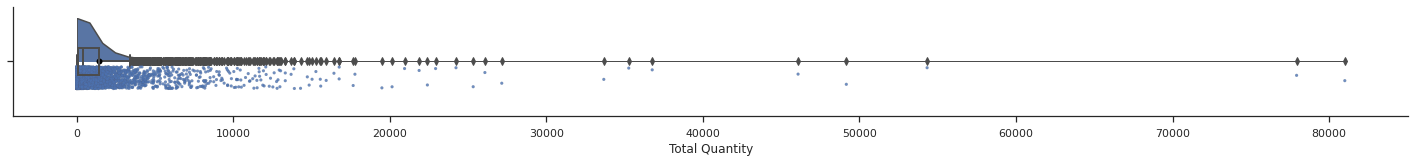

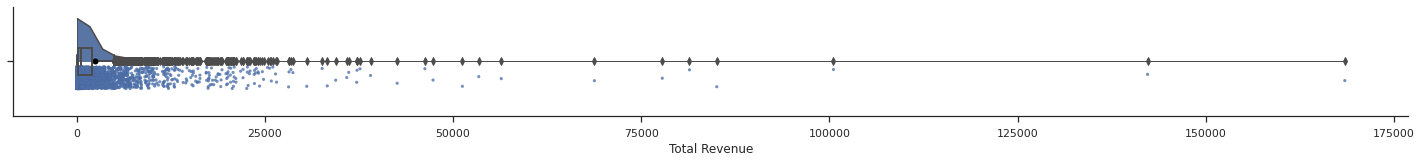

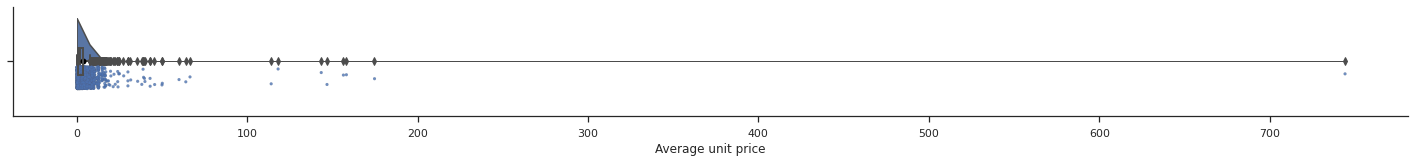

In [30]:
# Plot graph
for col in df_stockcode.columns[1:]:
    plt.figure(figsize=(25,2))
    VoBoSt_plot(DATA = df_stockcode, X = col)
    plt.show()

#### CustomerID Analysis

In [31]:
# Create dataframe for stock code
df_CustomerID = df['CustomerID'].value_counts().reset_index().sort_values(by=["index"], ignore_index=True ) 
df_CustomerID = df_CustomerID.rename(columns={'index': 'Customer', 'CustomerID':'Number of Transaction'})
# df_CustomerID['Total Quantity'] = df.groupby(['CustomerID'], as_index = False)['Quantity'].sum()['Quantity']
df_CustomerID['Products Count'] = df.groupby(['CustomerID'], as_index = True)['StockCode'].apply(lambda x : len(set(x))).reset_index(drop=False).sort_values(by="CustomerID")['StockCode']
df_CustomerID['Total Revenue'] = df.groupby(['CustomerID'], as_index = False)['revenue'].sum().sort_values(by="CustomerID")['revenue']
# df_CustomerID['Average unit price'] = df.groupby(['CustomerID'], as_index = False)['UnitPrice'].mean()['UnitPrice'].astype(np.float32)
df_CustomerID

Customer  Number of Transaction  Products Count  Total Revenue
0        12346                      1               1   77183.601562
1        12347                    182             103    4310.000000
2        12348                     31              22    1797.239990
3        12349                     73              73    1757.550049
4        12350                     17              17     334.399994
...        ...                    ...             ...            ...
4334     18280                     10              10     180.600006
4335     18281                      7               7      80.820000
4336     18282                     12              12     178.050003
4337     18283                    721             263    2045.530029
4338     18287                     70              59    1837.280029

[4339 rows x 4 columns]

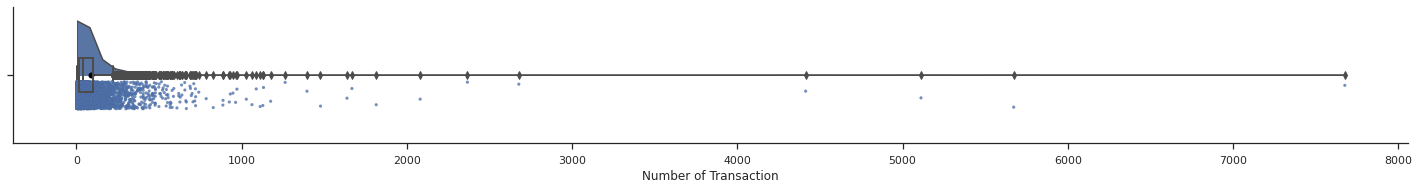

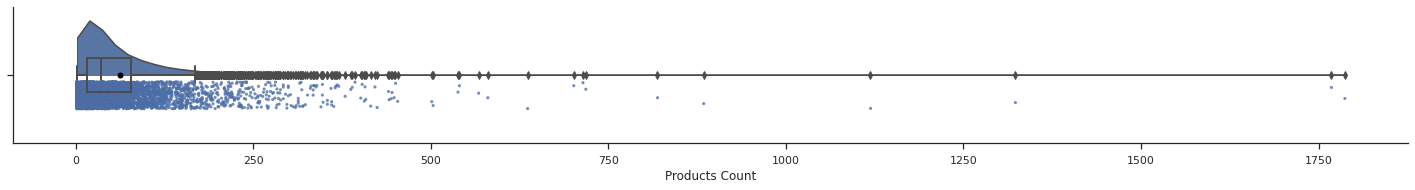

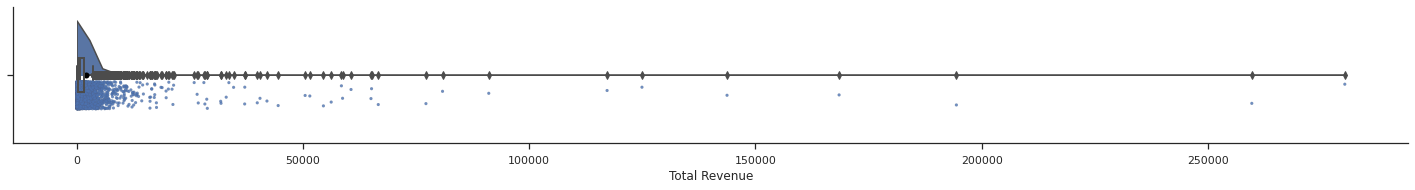

In [32]:
# Plot graph
for col in df_CustomerID.columns[1:]:
    plt.figure(figsize=(25,2.5))
    VoBoSt_plot(DATA = df_CustomerID, X = col)
    plt.show()

#### Date Time Analysis

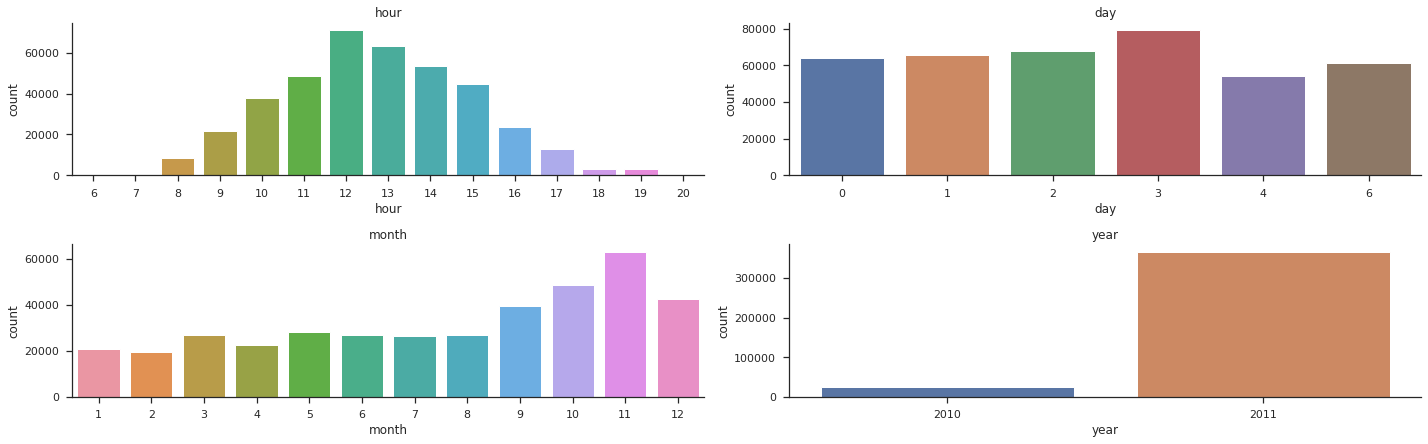

In [33]:
# Plotting top values based on frequency in each column
datetime_columns    = ['InvoiceDate', 'hour', 'day', 'month', 'year']
plt.figure(figsize=(20,15))
for n,col in enumerate(datetime_columns[1:]):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index()
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.title(col)
  plt.tight_layout()

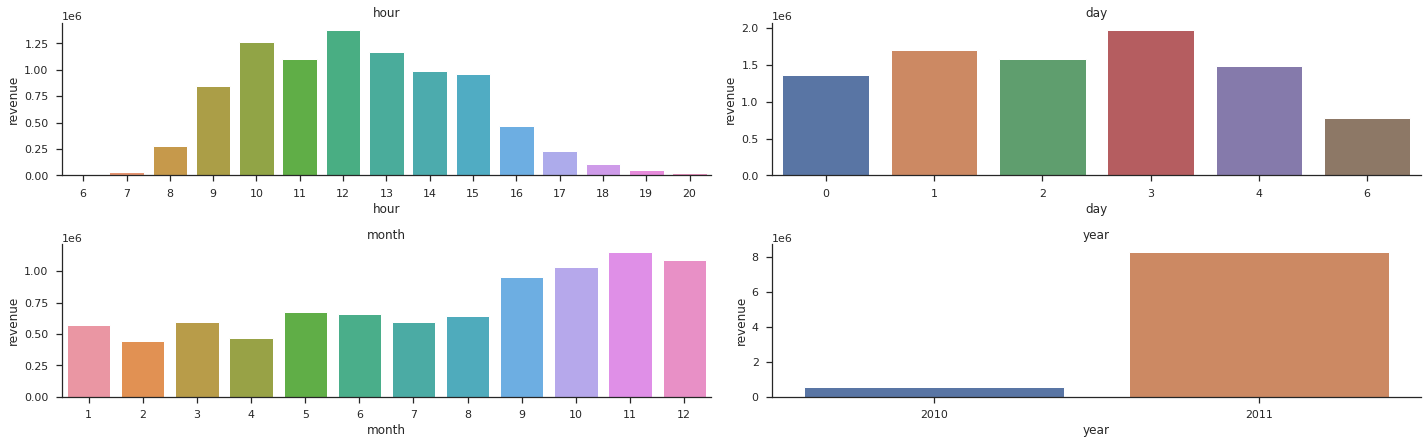

In [34]:
# Plotting top values based on frequency in each column
datetime_columns    = ['InvoiceDate', 'hour', 'day', 'month', 'year']
plt.figure(figsize=(20,15))
for n,col in enumerate(datetime_columns[1:]):
    plt.subplot(5, 2, n+1)
    temp = df.groupby([col], as_index = False)['revenue'].sum().sort_values(by=col)
    sns.barplot(x=col ,y='revenue', data=temp).set(title=col.title())
    plt.title(col)
    plt.tight_layout()

#### Region Analysis

In [28]:
# Create dataframe for stock code
df_Country = df['Country'].value_counts().reset_index().sort_values(by=["index"], ignore_index=True ) 
df_Country = df_Country.rename(columns={'index': 'country', 'Country':'Number of Transaction'})
df_Country['Products Count'] = df.groupby(['Country'], as_index = True)['StockCode'].apply(lambda x : len(set(x))).reset_index(drop=False).sort_values(by="Country")['StockCode']
df_Country['Customer Count'] = df.groupby(['Country'], as_index = True)['CustomerID'].apply(lambda x : len(set(x))).reset_index(drop=False).sort_values(by="Country")['CustomerID']
df_Country['Total Revenue'] = df.groupby(['Country'], as_index = False)['revenue'].sum().sort_values(by="Country")['revenue']

df_Country.head()

country  Number of Transaction  Products Count  Customer Count  \
0  Australia                   1184             599               9   
1    Austria                    398             306              11   
2    Bahrain                     17              16               2   
3    Belgium                   2031             777              25   
4     Brazil                     32              32               1   

   Total Revenue  
0  138453.812500  
1   10198.679688  
2     548.400024  
3   41196.339844  
4    1143.599976

In [33]:
df_Country.tail()

country  Number of Transaction  Products Count  \
32           Switzerland                   1842             947   
33                   USA                    179             163   
34  United Arab Emirates                     68              68   
35        United Kingdom                 349227            3645   
36           Unspecified                    241             213   

    Customer Count  Total Revenue  
32              21   5.644395e+04  
33               4   3.580390e+03  
34               2   1.902280e+03  
35            3921   7.285024e+06  
36               4   2.660770e+03

In [32]:
# Plot world map
data = dict(type='choropleth',
            locations = df_Country['country'],
            locationmode = 'country names',
            z = df_Country['Number of Transaction'],
            text = df_Country['country'],
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)


layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

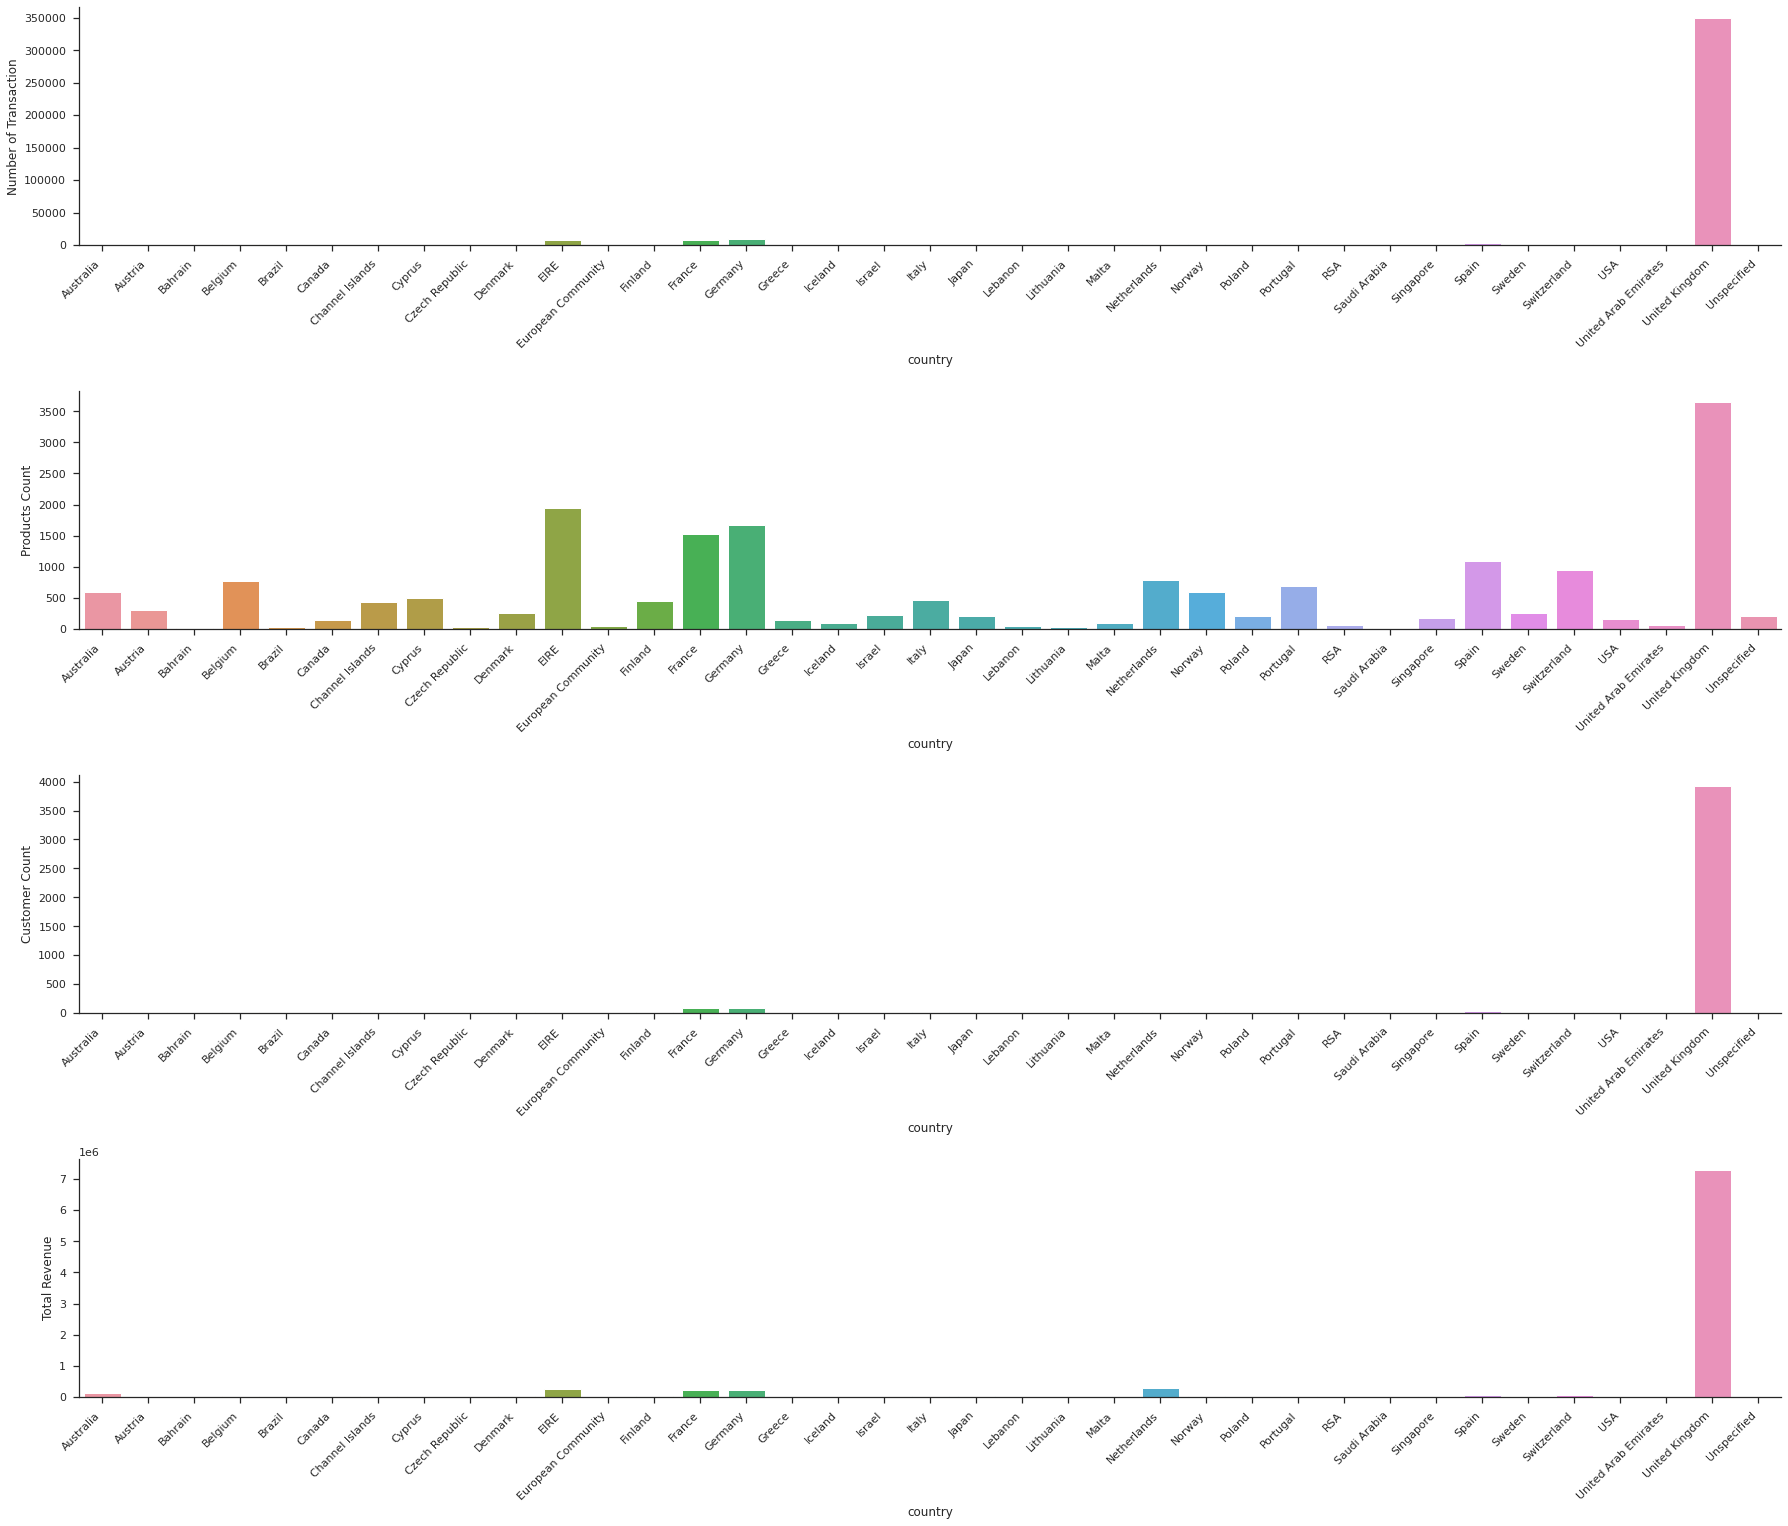

In [36]:
# Plotting top values based on frequency in each column
plt.figure(figsize=(25,25))
for n,col in enumerate(df_Country.columns[1:]):
    plt.subplot(5, 1, n+1)
    temp = df_Country.copy(deep = True).sort_values(by=[col]).reset_index()
    ax = sns.barplot(x='country' ,y=col, data = temp)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()

## Extra

In [ ]:
# # Plot the graph
# fig = px.treemap(data_frame=df_vc,
#                  path=['StockCode'],
#                  title='Positive and Negative skew data Visualization',
#                  names='index',
#                  color_continuous_scale='RdBu',
#                  color_continuous_midpoint=0)

# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()


In [ ]:
# import matplotlib.pyplot as plt
# import squarify
# import pandas as pd

# sqaure_sizes=[10, 30, 50, 200]
# labels=["A", "B", "C", "D"]
# # colors=['red','blue','green','yellow']
# squarify.plot(sizes=sqaure_sizes, label=labels, alpha=0.7 )
# plt.axis('off')
# plt.show()

#### Univariate analysis

In [ ]:
# # Plotting top values based on frequency in each column
# target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
#           'year', 'Month','Day','hour','TimeType']
# plt.figure(figsize=(20,25))
# for n,col in enumerate(target):
#   plt.subplot(5, 2, n+1)
#   temp = customer_data[col].value_counts().reset_index().head(12)
#   temp.rename(columns={'index': col, col:'count'}, inplace=True)
#   sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
#   plt.xticks(rotation=20,ha='right')
#   plt.title(target[n])
#   plt.tight_layout()

In [ ]:
# # Plotting Bottom values based on frequency in each column
# target = ['StockCode', 'Description','Country']
# plt.figure(figsize=(18,7))
# for n,col in enumerate(target):
#   plt.subplot(1, 3, n+1)
#   temp = customer_data[col].value_counts().reset_index().tail(5)
#   temp.rename(columns={'index': col, col:'count'}, inplace=True)
#   sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
#   plt.xticks(rotation=20,ha='right')
#   plt.tight_layout()

Observations/Hypothesis:
1. Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers 
2. There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
3. Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
4. Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
5. WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products

In [ ]:
# # Visualizing the distributions.
# target = ['Quantity','UnitPrice','TotalAmount']
# plt.figure(figsize=(18,7))

# for n,col in enumerate(target):
#   plt.subplot(1, 3, n+1)
#   sns.distplot(customer_data[col])
#   plt.title(col.title())
#   plt.tight_layout()

Observation:
1. It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
2. For symmetric graph mean=median=mode.

In [ ]:
# # Visualizing the distributions after log transformation of Quantity
# plt.figure(figsize=(18,8),dpi=200)
# plt.title('log distribution of Quantity')
# sns.distplot(np.log(customer_data['Quantity']))
# plt.plot()

#### Bivariate analysis

In [ ]:
# # Most orders placed are from these countries
# country_invoice = customer_data.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
# country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
# country_invoice.head()

In [ ]:
# # Visualizing top and bottom 10 countries based on total invoices 
# plt.figure(figsize=(18,8))
# plt.subplot(1,2,1)
# plt.xticks(rotation=20,ha='right')
# plt.title("Most orders placed are from these countries")
# sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

# plt.subplot(1,2,2)
# plt.xticks(rotation=20,ha='right')
# plt.title("Least orders placed are from these countries")
# sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
# plt.show()

* United Kingdom has most number of customers 


In [ ]:
# # Most customers are from these countries
# country_cust = customer_data.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
# country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
# country_cust.head()

In [ ]:
# # Visualizing top and bottom 10 countries based on total customers 
# plt.figure(figsize=(18,8))
# plt.subplot(1,2,1)
# plt.xticks(rotation=20,ha='right')
# plt.title("Most customers are from these countries")
# sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

# plt.subplot(1,2,2)
# plt.xticks(rotation=20,ha='right')
# plt.title("Least customers are from these countries")
# sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
# plt.show()

In [ ]:
# # Countrywise average item purchases
# country_quantity = customer_data.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
# country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
# country_quantity.head()

In [ ]:
# # Visualizing top and bottom 10 countries based on average item purchases 
# plt.figure(figsize=(18,8))
# plt.subplot(1,2,1)
# plt.xticks(rotation=20,ha='right')
# plt.title("High quantity orders are from these countries")
# sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

# plt.subplot(1,2,2)
# plt.xticks(rotation=20,ha='right')
# plt.title("Low quantity orders are from these countries")
# sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
# plt.show()

In [ ]:
# # quantity wise item purchases
# product_quantity = customer_data.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
# product_quantity.head()

In [ ]:
# # Visualizing top and bottom 10 products based on purchase quantity
# plt.figure(figsize=(18,8))
# plt.subplot(1,2,1)
# plt.xticks(rotation=20,ha='right')
# plt.title("Product with High quantity orders")
# sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

# plt.subplot(1,2,2)
# plt.xticks(rotation=20,ha='right')
# plt.title("Product with low quantity orders")
# sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
# plt.show()

In [ ]:
# # Amount wise item purchases
# product_price = customer_data.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
# product_price.head()

In [ ]:
# # Visualizing top and bottom 10 products based on amount
# plt.figure(figsize=(18,8))
# plt.subplot(1,2,1)
# plt.xticks(rotation=20,ha='right')
# plt.title("Product that made most of the revenue")
# sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

# plt.subplot(1,2,2)
# plt.xticks(rotation=20,ha='right')
# plt.title("Product that made least revenue")
# sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
# plt.show()

In [ ]:
# # customer wise item purchases
# product_customer = customer_data.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
# product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
# product_customer.head()

In [ ]:
# # Visualizing top and bottom 10 products based on customers
# plt.figure(figsize=(18,8))
# plt.subplot(1,2,1)
# plt.xticks(rotation=20,ha='right')
# plt.title("Product with large customer base")
# sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

# plt.subplot(1,2,2)
# plt.xticks(rotation=20,ha='right')
# plt.title("Product with small customer base")
# sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
# plt.show()

In [ ]:
# customer_data["InvoiceDate"].min()

In [ ]:
# customer_data["InvoiceDate"].max()

- The Latest Date recorded is on 9th of December 2011

## <font size="+2.5" color='#144c5c'><b>  <u>RFM analysis for Customer Segmentation</u>

RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the three factors RECENCY, Frequency, and Monetary. 
1. Recency: How recently did the customer make a purchase? If they made a purchase recently, the likelihood of them making another purchase is high. However, if the customer hasn't made a purchase in a while, you may need to nurture them with new promotional offers or even reintroduce your brand.

2. Frequency: How often does the customer make purchases? If they purchase often, you'll know their spending habits and preferences, but if they make one purchase and never return, they could be a good candidate for a customer satisfaction survey.

3. Monetary Value: How much do your customers spend per purchase? Don't get too caught up on the number here, though — all purchases are valuable. However, the first two letters in the RFM acronym can be visualized more clearly by this third component. If they've made many recent purchases at a high price point, you've got a returning customer that can turn into a brand loyalist.

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

 ### Feature Engineering - Building features for RFM model

#### Recency
We fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we calculate the days difference between the most recent transaction carried out by the customer and this reference date.

In [34]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
refrence_date = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
RFM_df = df.groupby('CustomerID',as_index = False )['InvoiceDate'].apply(lambda x: (refrence_date - x.max()).days).sort_values(by= 'CustomerID')

# Renaming the columns
RFM_df.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)

#### Frequency
It is defined as the number of times a customer make purchases. It can be calulated by determing the number of invoices per customer ID.

In [35]:
# Calculate Frequency
RFM_df['Frequency'] = df[['CustomerID','InvoiceNo']].groupby('CustomerID',as_index = False ).count().sort_values(by= 'CustomerID')['InvoiceNo']

#### Monetary value
How much money customers have spend on purchasing products.


In [36]:
# Calculate Monetary
RFM_df['Monetary'] = df[['CustomerID', 'revenue']].groupby('CustomerID').sum().sort_values(by= 'CustomerID').reset_index()['revenue']
# view it 
RFM_df.head()

CustomerID  Recency  Frequency      Monetary
0       12346      326          1  77183.601562
1       12347        2        182   4310.000000
2       12348       75         31   1797.239990
3       12349       19         73   1757.550049
4       12350      310         17    334.399994

 ### RFM Analysis

In [37]:
# View it
RFM_df.head()

CustomerID  Recency  Frequency      Monetary
0       12346      326          1  77183.601562
1       12347        2        182   4310.000000
2       12348       75         31   1797.239990
3       12349       19         73   1757.550049
4       12350      310         17    334.399994

In [38]:
# Describe it 
RFM_df[['Recency', 'Frequency', 'Monetary']].describe().T

count         mean          std  min         25%         50%  \
Recency    4339.0    92.518322   100.009747  1.0   18.000000   51.000000   
Frequency  4339.0    90.512100   225.515328  1.0   17.000000   41.000000   
Monetary   4339.0  2048.216064  8984.248047  0.0  306.455002  668.559998   

                   75%           max  
Recency     142.000000     374.00000  
Frequency    98.000000    7676.00000  
Monetary   1660.315002  280206.03125

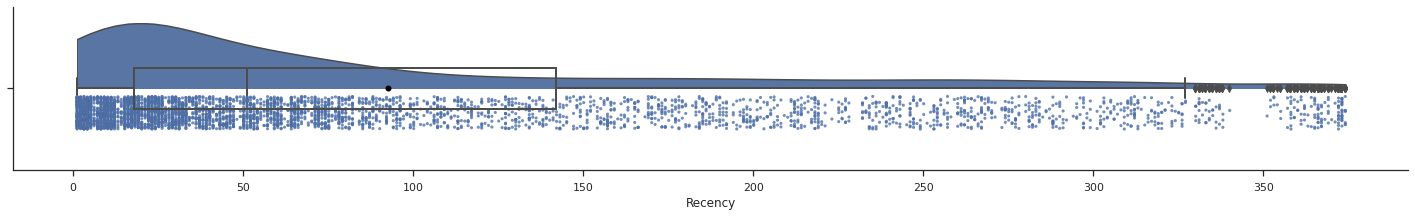

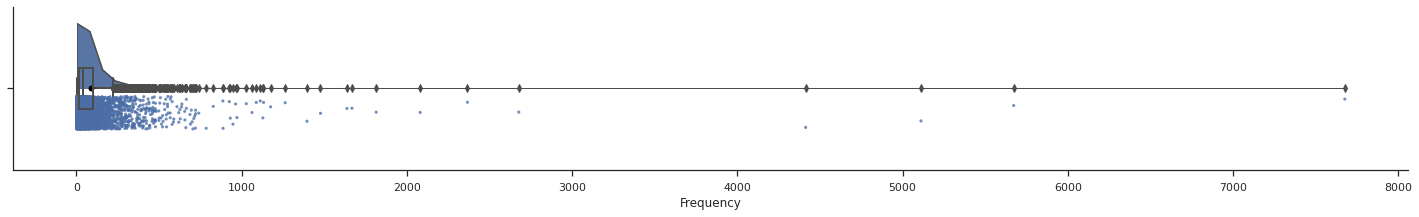

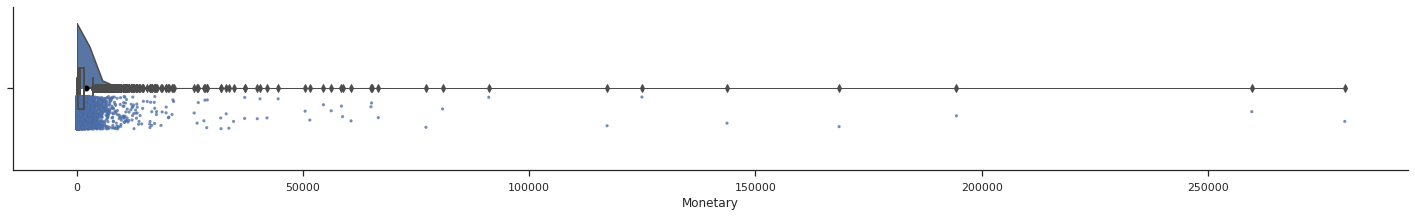

In [39]:
# Plot graph
for col in RFM_df.columns[1:]:
    plt.figure(figsize=(25,3))
    VoBoSt_plot(DATA = RFM_df, X = col)
    plt.show()

In [40]:
# Function to get amount of outliers in numerical columns
def outlier_prcnt(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-3*iqr
        fence_high = q3+3*iqr

        # Print total outlers and percentage using IQR method
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outer outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

# Lets get the amount of outliers in each numerical columns
outlier_prcnt(RFM_df, ['Recency', 'Frequency', 'Monetary'])

Total outer outliers in Recency are: 0 - 0.0%.
Total outer outliers in Frequency are: 179 - 4.13%.
Total outer outliers in Monetary are: 222 - 5.12%.


In [41]:
# Removing high value outliers from Rainfall and Snowfail by capping the top 1% values 
for col in ['Frequency', 'Monetary']:
    q1 = RFM_df[col].quantile(0.25)
    q3 = RFM_df[col].quantile(0.75)
    iqr = q3-q1  #Interquartile range
    upper_limit = q3+3*iqr
    RFM_df[col] = np.where(RFM_df[col] > upper_limit, upper_limit, RFM_df[col]) 

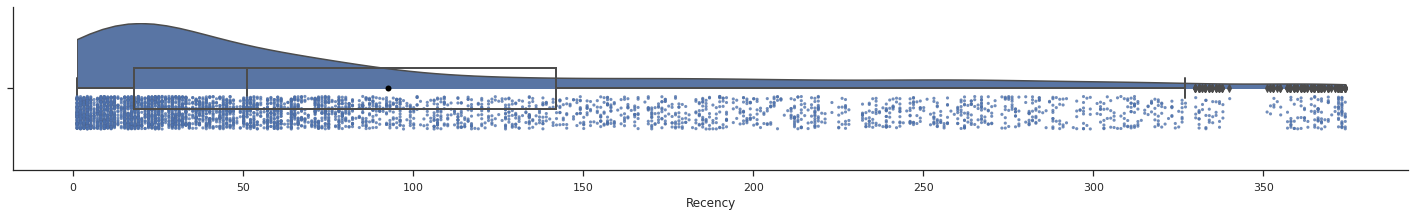

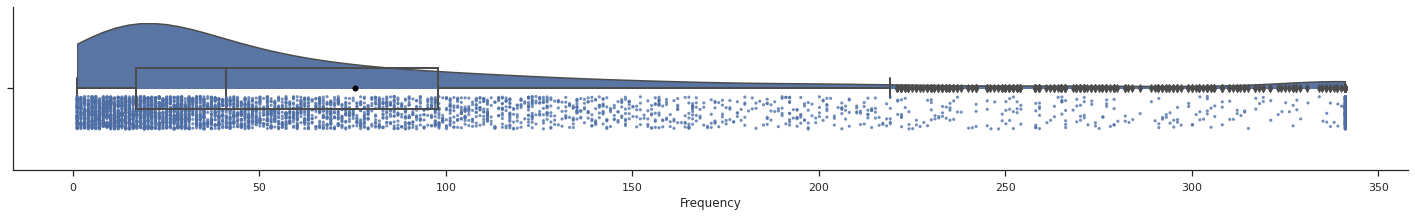

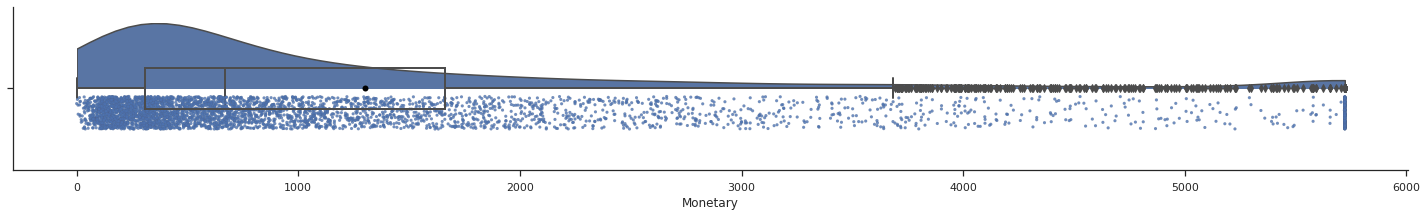

In [42]:
# Plot graph
for col in RFM_df.columns[1:]:
    plt.figure(figsize=(25,3))
    VoBoSt_plot(DATA = RFM_df, X = col)
    plt.show()

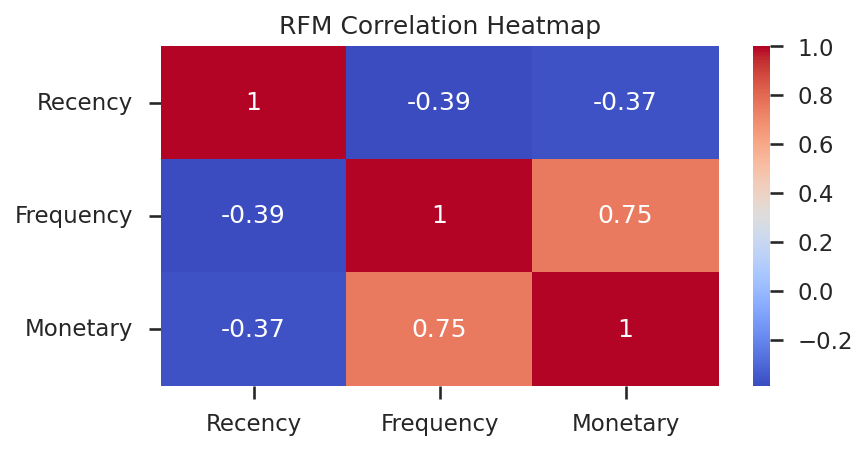

In [43]:
# Visualizing the correlations among features.
target =  ['Recency', 'Frequency', 'Monetary']
plt.figure(figsize = (6, 3),dpi=150)
sns.heatmap(RFM_df[target].corr(), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

In [51]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
RFM_df[['Recency', 'Frequency', 'Monetary']] = transformer.fit_transform(RFM_df[['Recency', 'Frequency', 'Monetary']])

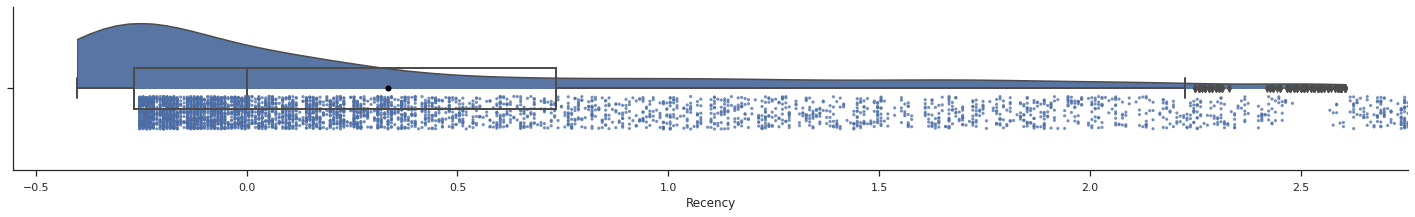

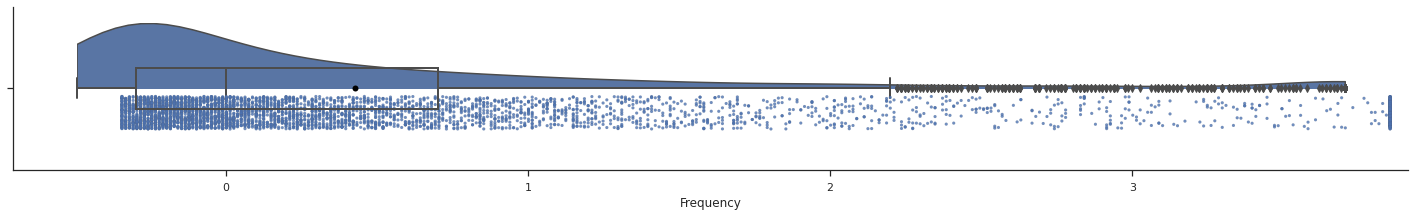

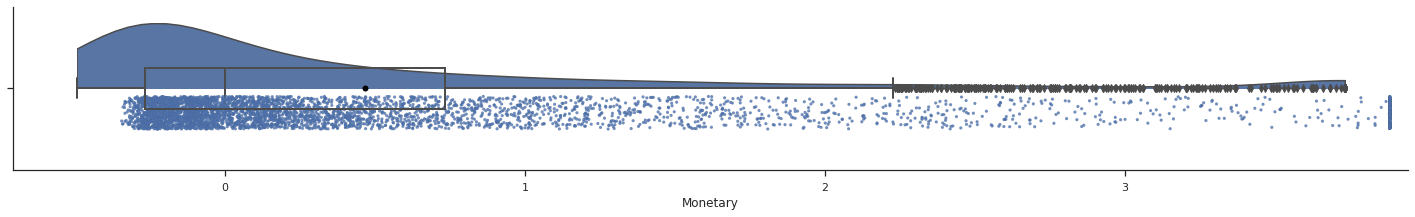

In [53]:
# Plot graph
for col in RFM_df.columns[1:]:
    plt.figure(figsize=(25,3))
    VoBoSt_plot(DATA = RFM_df, X = col)
    plt.show()

 ### Extra

In [ ]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']



Interpretation:
1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
3. If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
4. Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [ ]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

In [ ]:
# Checking Descriptive Stats
rfm.describe()

Recency    Frequency       Monetary            R            F  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean     92.518322    90.512100    2048.216154     2.514174     2.487670   
std     100.009747   225.515328    8984.248299     1.126392     1.122724   
min       1.000000     1.000000       1.000000     1.000000     1.000000   
25%      18.000000    17.000000     306.455000     2.000000     1.000000   
50%      51.000000    41.000000     668.560000     3.000000     2.000000   
75%     142.000000    98.000000    1660.315000     4.000000     3.000000   
max     374.000000  7676.000000  280206.020000     4.000000     4.000000   

                 M          RFM    RFM_Score  Recency_Log  Frequency_Log  \
count  4339.000000  4339.000000  4339.000000  4339.000000    4339.000000   
mean      2.499885   278.793962     7.501729     3.767274       3.670868   
std       1.118266   118.825268     2.816451     1.432382       1.321685   
min       1.000000   111.000000     3.000000     0.000000       0.000000   
25%       1.500000   211.000000     5.000000     2.890372       2.833213   
50%       2.000000   311.000000     7.000000     3.931826       3.713572   
75%       3.500000   411.000000    10.000000     4.955827       4.584967   
max       4.000000   444.000000    12.000000     5.924256       8.945854   

       Monetary_Log  
count   4339.000000  
mean       6.584187  
std        1.265573  
min        0.000000  
25%        5.725071  
50%        6.505126  
75%        7.414763  
max       12.543280

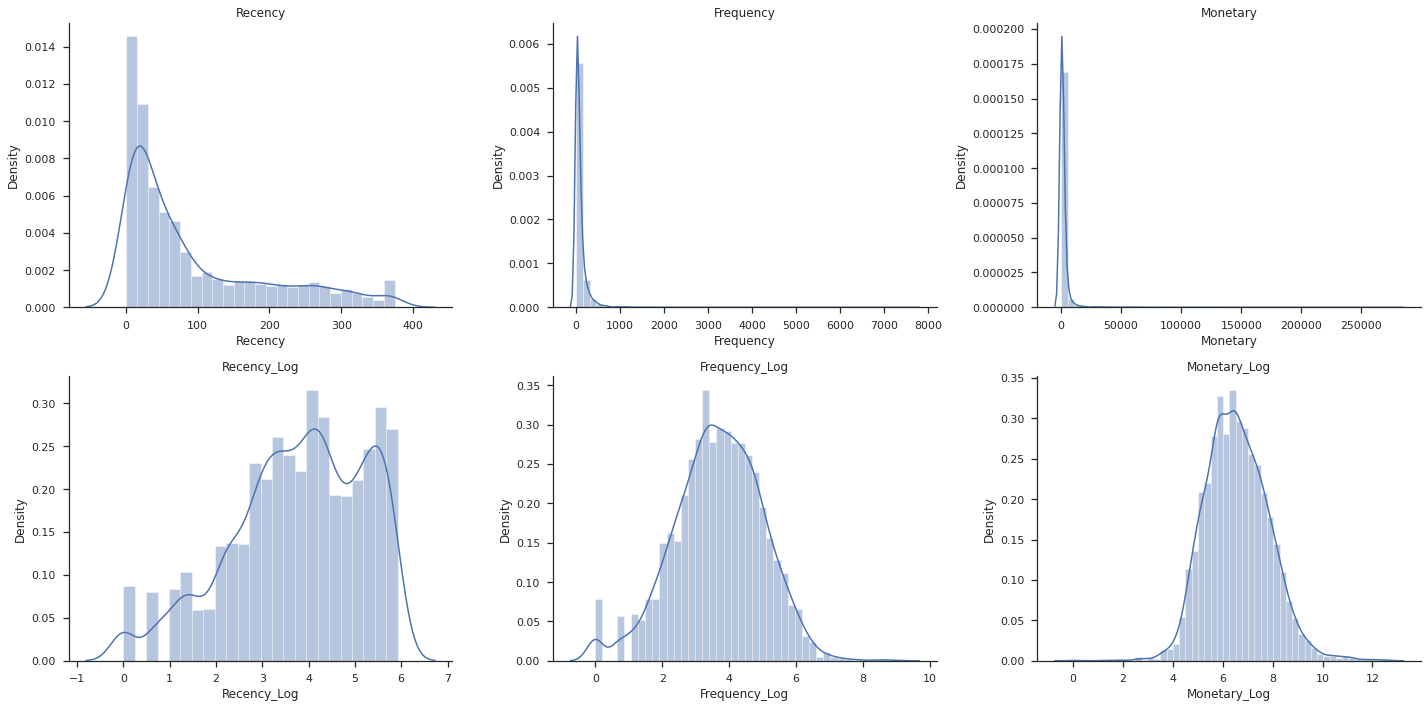

In [ ]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10))
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations:
1. Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
2. It will be more suitable to use the transformed features for better visualisation of clusters.

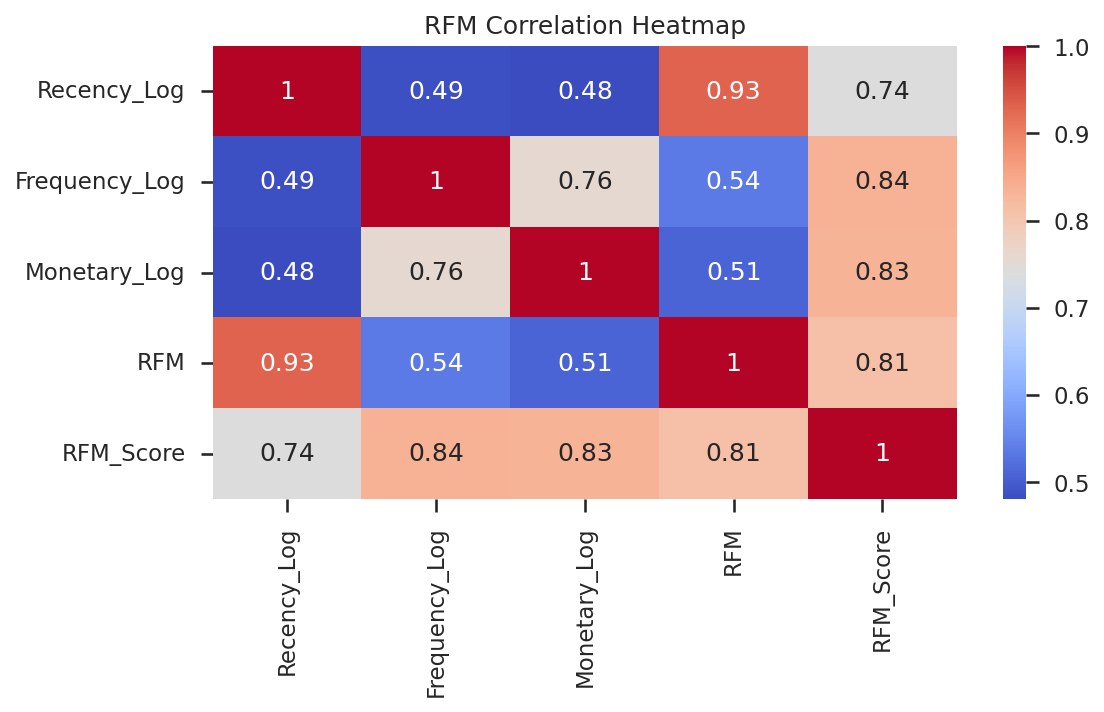

In [ ]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4),dpi=150)
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

## <font size="+2.5" color='#144c5c'><b>  <u>Applying Clustering Algorithms </u>

### Quantile CUT

In [62]:
# Calculate RFM Scores


def get_rfm_scores(dataframe):
    
    df_ = dataframe.copy()
    df_['recency_score'] = pd.qcut(df_['Recency'],5,labels = [5, 4, 3, 2, 1])
    df_['frequency_score'] = pd.qcut(df_['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
    df_['monetary_score'] = pd.qcut(df_['Monetary'], 5, labels = [1, 2, 3, 4, 5])
    df_['RFM_SCORE'] = (df_['recency_score'].astype(str) + df_['frequency_score'].astype(str))
    
    return df_

rfm = get_rfm_scores(RFM_df)

rfm.head()

CustomerID   Recency  Frequency  Monetary recency_score frequency_score  \
0       12346  2.217742  -0.493827  3.732539             1               1   
1       12347 -0.395161   1.740741  2.689672             5               5   
2       12348  0.193548  -0.123457  0.833676             2               3   
3       12349 -0.258065   0.395062  0.804359             4               4   
4       12350  2.088710  -0.296296 -0.246820             1               2   

  monetary_score RFM_SCORE  
0              5        11  
1              5        55  
2              4        23  
3              4        44  
4              2        12

In [94]:
# Segmentation
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential\nloyalists',
           r'5[4-5]': 'champion'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)
rfm[['Recency', 'Frequency', 'Monetary']] = transformer.inverse_transform(rfm[['Recency', 'Frequency', 'Monetary']])

rfm.head()

CustomerID  Recency  Frequency      Monetary recency_score frequency_score  \
0       12346  40475.0      122.0  7.747313e+06             1               1   
1       12347    299.0    14783.0  5.835805e+06             5               5   
2       12348   9351.0     2552.0  2.433880e+06             2               3   
3       12349   2407.0     5954.0  2.380145e+06             4               4   
4       12350  38491.0     1418.0  4.533993e+05             1               2   

  monetary_score RFM_SCORE          segment  
0              5        11      hibernating  
1              5        55         champion  
2              4        23          at_Risk  
3              4        44  loyal_customers  
4              2        12      hibernating

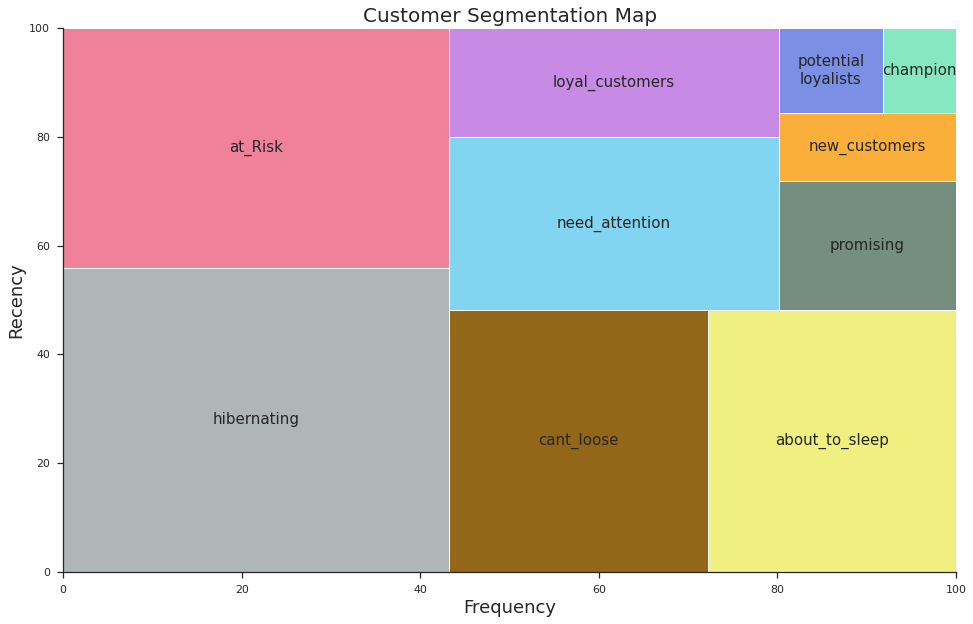

In [95]:
segments = rfm['segment'].value_counts().sort_values(ascending = False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(sizes=segments,
              label=[label for label in seg_map.values()],
              color=['#AFB6B5', '#F0819A', '#926717', '#F0F081', '#81D5F0',
                     '#C78BE5', '#748E80', '#FAAF3A', '#7B8FE4', '#86E8C0'],
              pad = False,
              bar_kwargs = {'alpha': 1},
              text_kwargs = {'fontsize':15})
plt.title("Customer Segmentation Map", fontsize = 20)
plt.xlabel('Frequency', fontsize = 18)
plt.ylabel('Recency', fontsize = 18)
plt.show()

In [96]:
# Model Evaluation

print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')

======================== RFM Model Evaluation ========================
Number of Observations: 4339
Number of Segments: 10
Silhouette Score: 0.469


In [104]:
# Segment Analysis
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

rfm[['Recency','Monetary','Frequency','segment']].groupby('segment').agg({'min',q25, 'median', q75 ,'max'}).reindex(columns=['min', 'q25', 'median' ,'q75', 'max'], level = 1).astype(int)

Recency                             Monetary           \
                         min    q25 median    q75    max      min      q25   
segment                                                                      
about_to_sleep          4267   5631   6623   7987   8979     9062   261584   
at_Risk                 9103  11955  18031  26494  46427   139317   617064   
cant_loose              9103  11149  15303  21999  46179   532545  1453928   
champion                 175    423    671   1167   1663   259892  1975909   
hibernating             9103  16543  26463  34895  46427     5745   206252   
loyal_customers         1787   2779   3771   5631   8979   209636  1410910   
need_attention          4267   5383   6623   7615   8979   127687   622415   
new_customers            175    547   1043   1291   1415    57517   196240   
potential\nloyalists     175   1043   2159   3027   4143    93868   468373   
promising               1787   2283   2779   3523   4143      668   153952   

                                                Frequency                \
                       median      q75      max       min    q25 median   
segment                                                                   
about_to_sleep         440090   620357  7747313       122    770   1256   
at_Risk                989257  1553051  7747313      2390   3038   4091   
cant_loose            2847917  4255667  7747313      9923  10976  12515   
champion              3544133  6811281  7747313      4658   8242  13487   
hibernating            374171   564740  7747313       122    608   1094   
loyal_customers       2380145  4028523  7747313      4658   6683   9356   
need_attention         927169  1283315  7747313      2390   2795   3281   
new_customers          290340   472671  7747313       122    365    689   
potential\nloyalists   804522  1249645  7747313      1175   1904   2714   
promising              260365   554363  7747313       122    365    608   

                                    
                        q75    max  
segment                             
about_to_sleep         1904   2390  
at_Risk                5630   9680  
cant_loose            16200  27662  
champion              24260  27662  
hibernating            1661   2390  
loyal_customers       14499  27662  
need_attention         3848   4658  
new_customers           932   1094  
potential\nloyalists   3686   4658  
promising               932   1175

# **Modelling**

In [ ]:
X=rfm[["Recency_Log",'Frequency_Log','Monetary_Log']]
X=StandardScaler().fit_transform(X)

In [ ]:
from IPython.core.pylabtools import figsize
# Intializing dictionary to stores conclusion and stats
conclusion={}

def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]


def print_stats_(data,segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame

    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
  '''

  agg_=data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  agg_[f'Count {segment_name}']=data[segment_name].value_counts()
  return agg_

def print_conclusion(data,segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame

    Features:This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  agg_1=data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(
      {"Recency":lambda x:f'Visited {int(x.quantile(0.25))} to {int(x.quantile(0.75))}  days ago',
       "Frequency":lambda x:f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))}  Times",
       "Monetary":lambda x:f"Spent Around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling",
       })
  # Changing the name for the columns 
  agg_1.columns=["Visited",'Brought',"Money Spent"]
  return agg_1
  


# Defining a function for plotting clusters for Visualization
def plotc(y, title,segment_name,overlap_supress=0.1):
  '''
      Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
    Returns: Array of DataFrames

    features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
# PART 1
  # Setting the size of the figure

  plt.figure(figsize = (18, 8))
  ax = plt.axes(projection ="3d")                       # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')          # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')        # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')         # Setting Z label
  ax.set_title(title, fontweight ='bold')               #  Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, 
                  cmap='viridis')                       # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})              # positioning legend
  plt.show()

  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  rfm[segment_name] = y                                 # Copying segment values to main data frame

  agg_1=print_conclusion(rfm,segment_name)              # Calling the print Conclusion Function saving into a variable (agg_1)

  agg_=print_stats_(rfm,segment_name)                   # Calling the print stats Function saving into a variable (agg_1)

  rfm_copy=rfm.copy()
    
# PART 2
# Plotting the distribution
  fig,ax=plt.subplots(3,figsize=(25,25))

# Initializing array to store legends for features for different segment
  groups_recency=[]                                     
  groups_frequency=[]
  groups_monetary=[]

# Running a for loop for iterating through the number of clusters
  for i in rfm[segment_name].unique():
    # Adding the labels for the legends
    groups_recency.append(f'Recency Distribution of Group {i}')
    groups_frequency.append(f'Frequency Distribution of Group {i}')
    groups_monetary.append(f'Monetary Distribution of Group {i}')

    # Plotting Recency Histogram plot
    for j,col_ in enumerate(['Recency',"Frequency","Monetary"]):
      sns.distplot(cap_outliers(rfm_copy[rfm_copy[segment_name]==i][col_],overlap_supress),ax=ax[j],kde_kws=dict(linewidth=5))
   

# Assiging legends for all the axes
  ax[0].set_title("Recency",fontsize=40)  # Setting the main title for Recency
  ax[1].set_title("Frequency",fontsize=40) # Setting the main title for Frequency
  ax[2].set_title("Monetary",fontsize=40) # Setting the main title for Monetary
  ax[0].legend(groups_recency,prop={'size': 30})
  ax[1].legend(groups_frequency,prop={'size': 30})
  ax[2].legend(groups_monetary,prop={'size': 30})
  plt.show()
  # Displaying the stats of the data frame segment wise
  print('')
  display(agg_.style.background_gradient(cmap="plasma"))
  print('')
  display(agg_1.reset_index())



  return agg_, agg_1


# Binning RFM Score

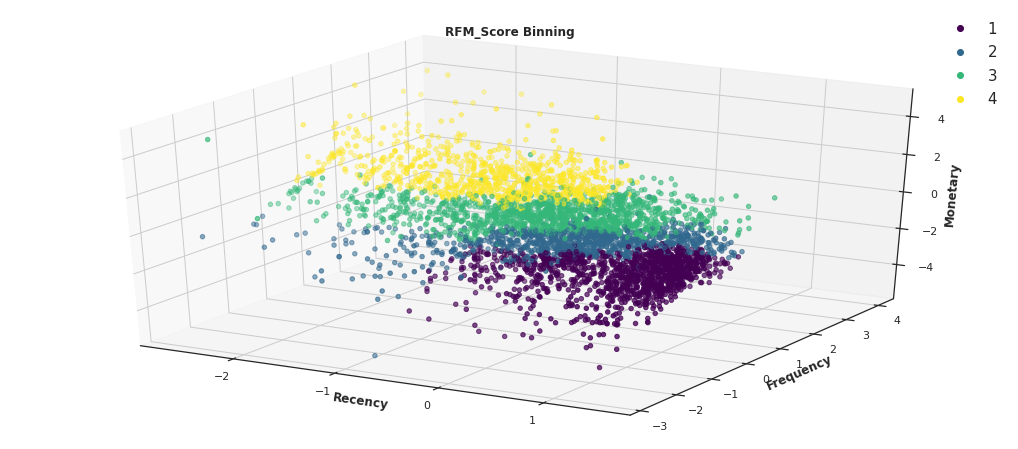

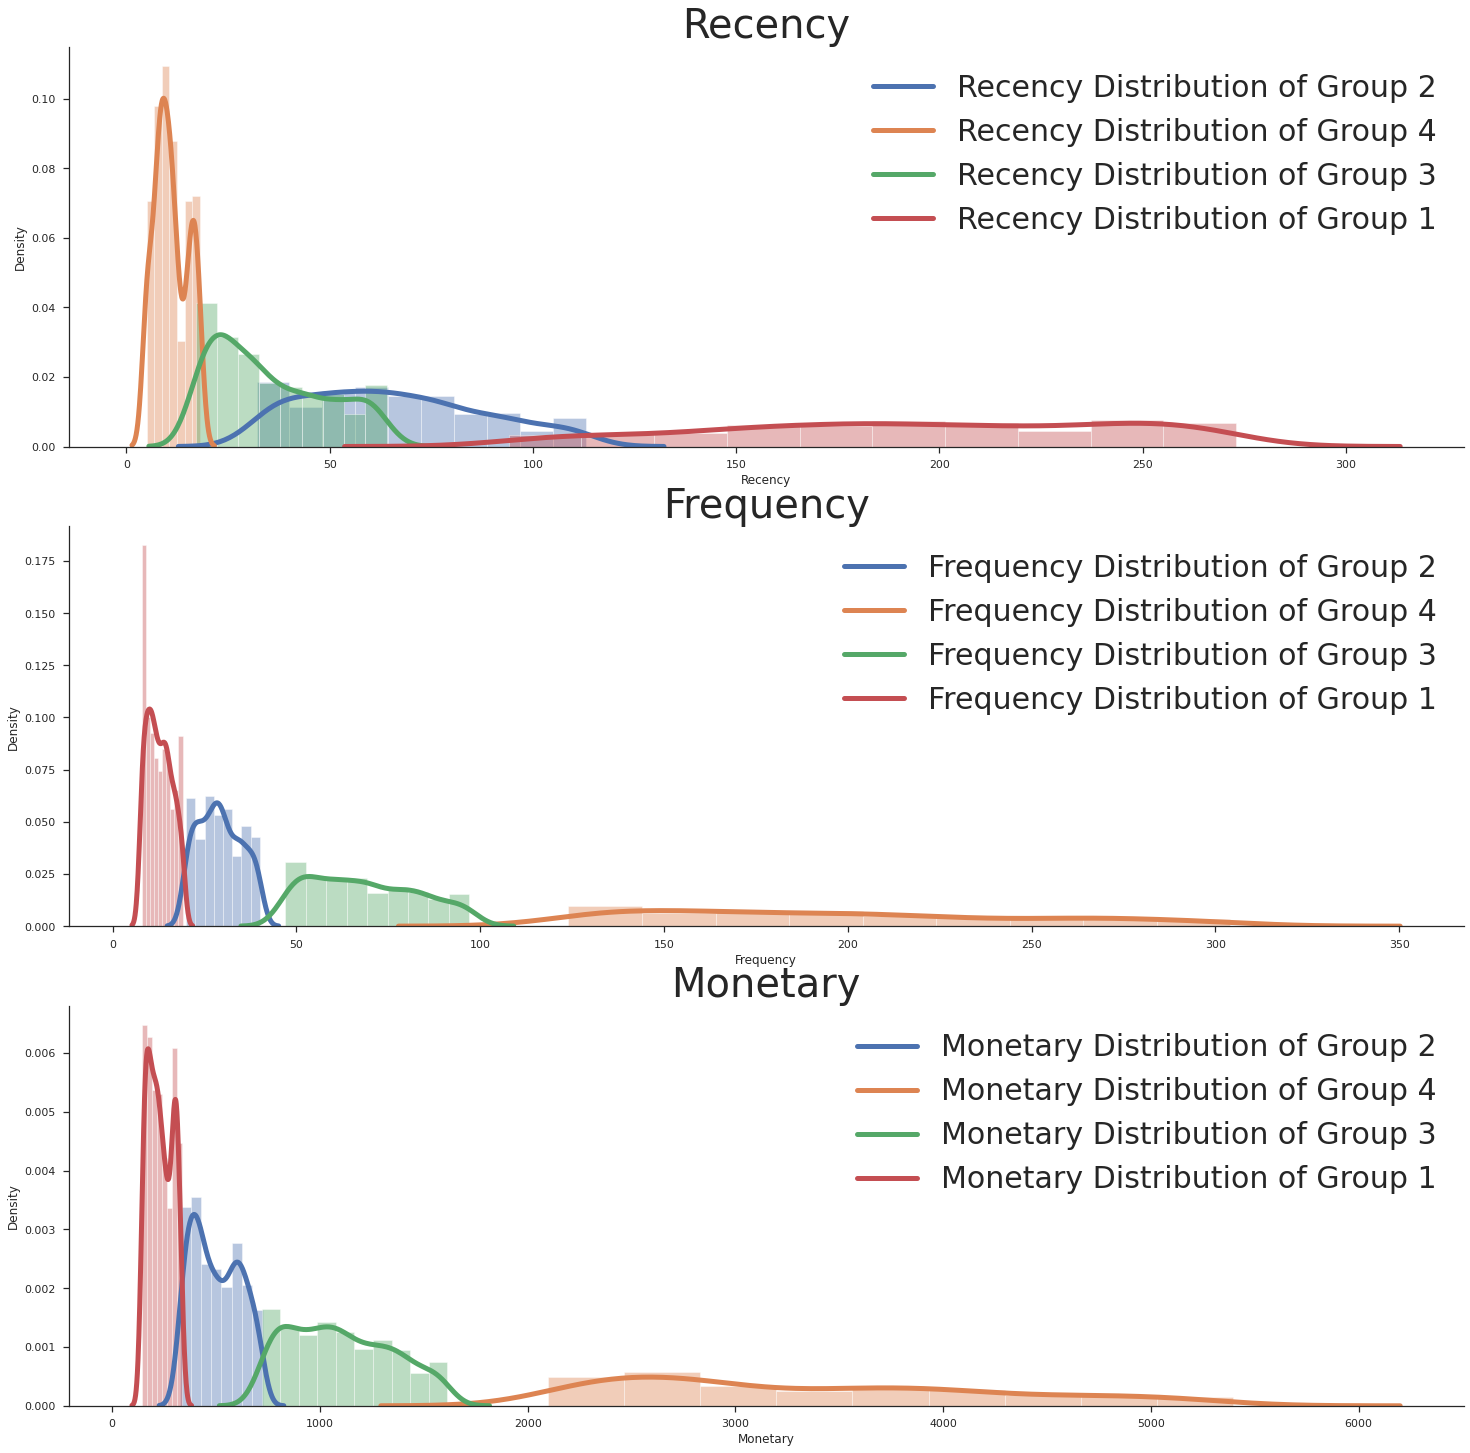

Binning_Segment_                      Visited                   Brought  \
0                 1  Visited 93 to 274  days ago     Bought 7 to 20  Times   
1                 2  Visited 31 to 114  days ago    Bought 19 to 41  Times   
2                 3   Visited 16 to 65  days ago    Bought 46 to 98  Times   
3                 4    Visited 4 to 19  days ago  Bought 123 to 305  Times   

                          Money Spent  
0    Spent Around 142 to 335 Sterling  
1    Spent Around 327 to 725 Sterling  
2   Spent Around 717 to 1613 Sterling  
3  Spent Around 2093 to 5398 Sterling

In [ ]:
# Splitting RFM_Score in 4 bins based on quantiles
y_bin = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
conclusion['Binning_Segment_']=plotc(y_bin,title,"Binning_Segment_",0.25)


# Quantile CUT


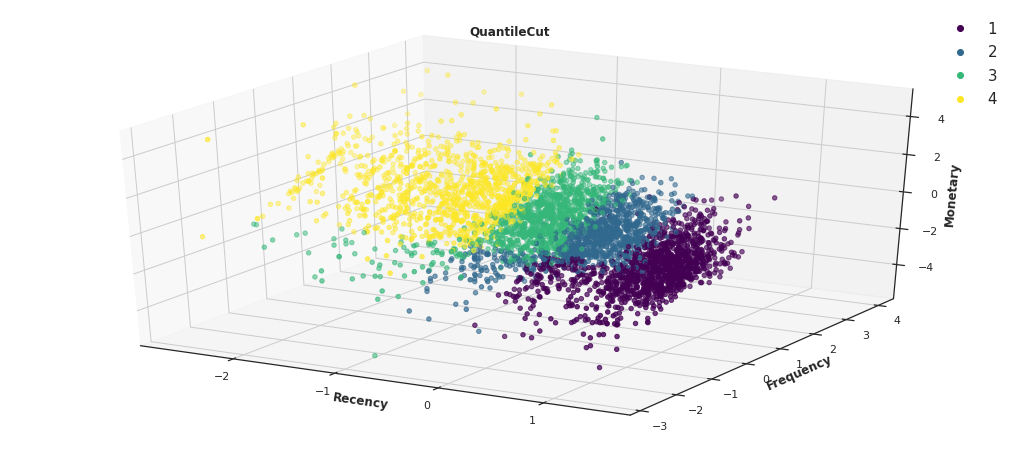

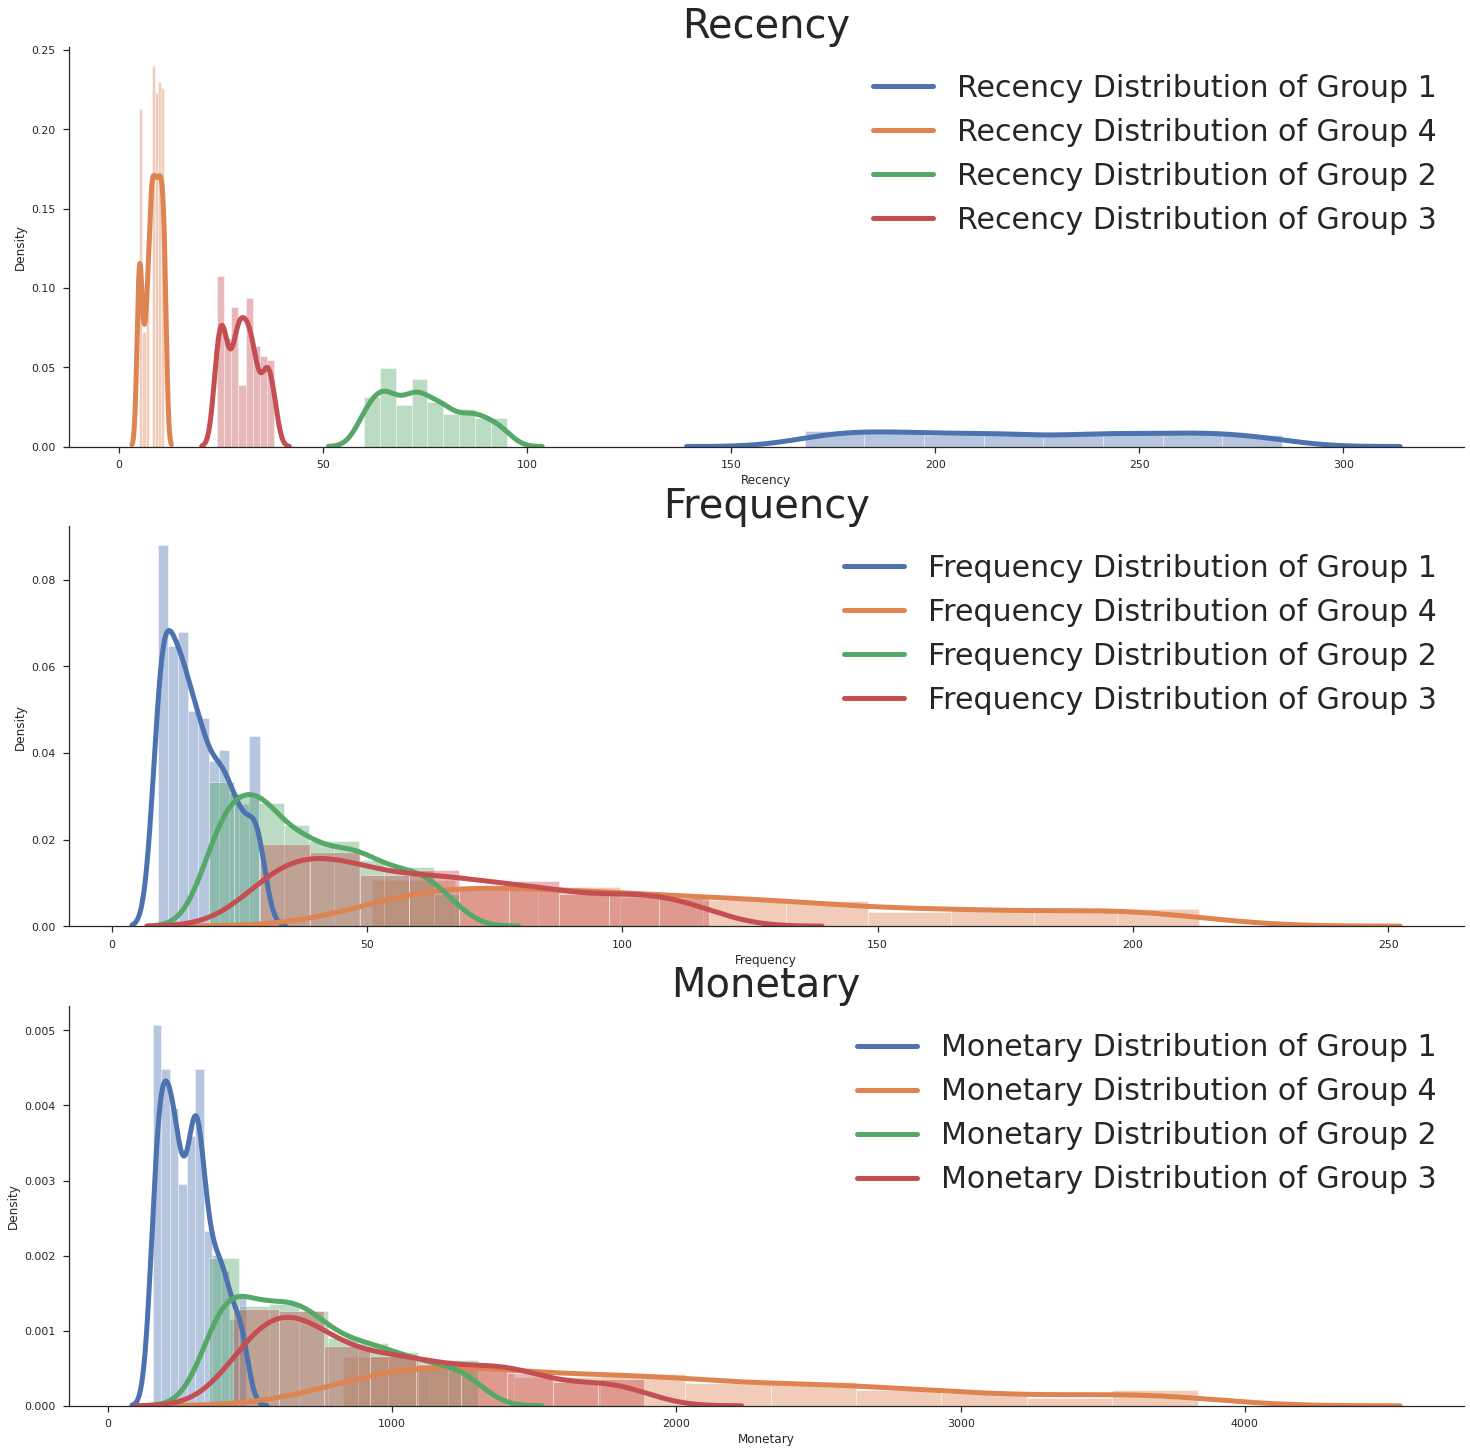

RFM Quantile Based Segmentation                       Visited  \
0                                1  Visited 166 to 286  days ago   
1                                2    Visited 59 to 96  days ago   
2                                3    Visited 23 to 39  days ago   
3                                4     Visited 4 to 12  days ago   

                   Brought                        Money Spent  
0    Bought 8 to 30  Times   Spent Around 156 to 486 Sterling  
1   Bought 18 to 69  Times  Spent Around 355 to 1301 Sterling  
2  Bought 28 to 118  Times  Spent Around 439 to 1887 Sterling  
3  Bought 50 to 214  Times  Spent Around 822 to 3849 Sterling

In [ ]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
conclusion[segment_name] = plotc(y, segment_name, title, overlap_supress)

# K-Means Clustering 

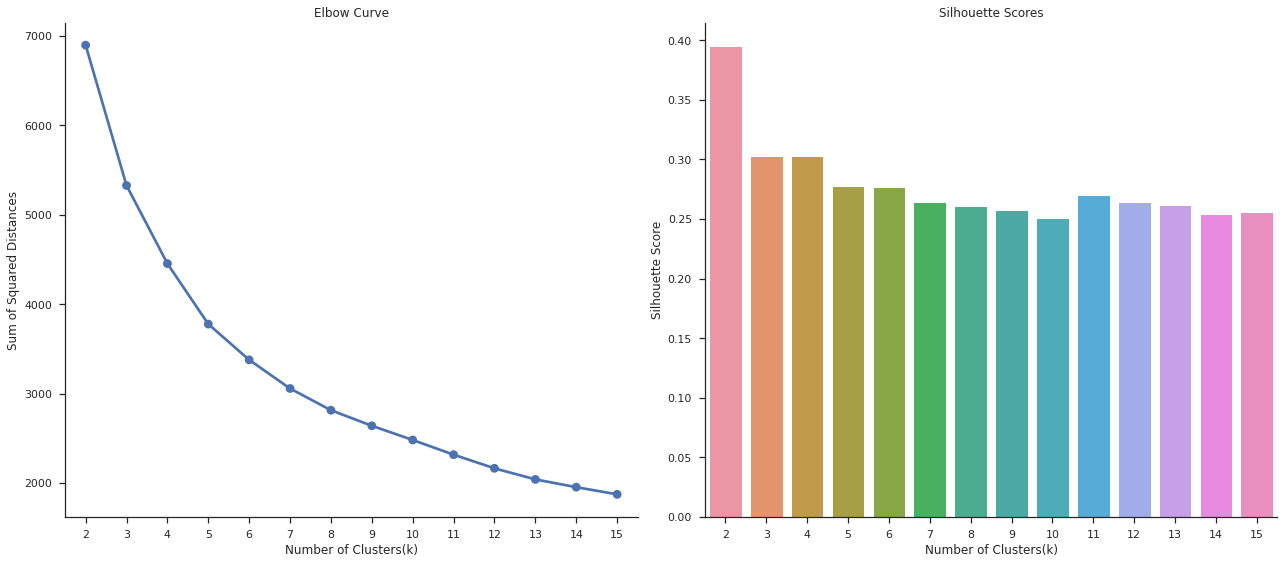

In [ ]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(18,8))

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

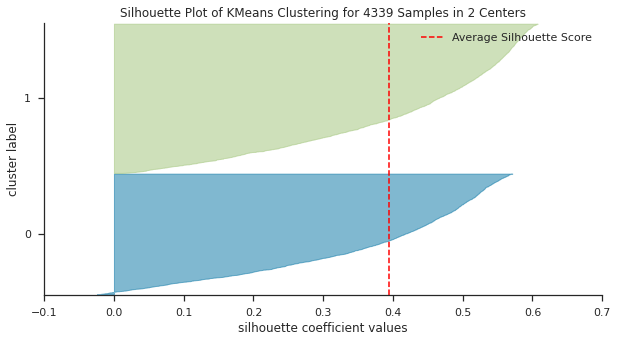

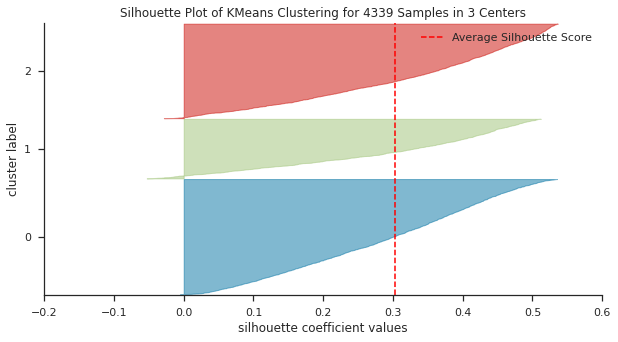

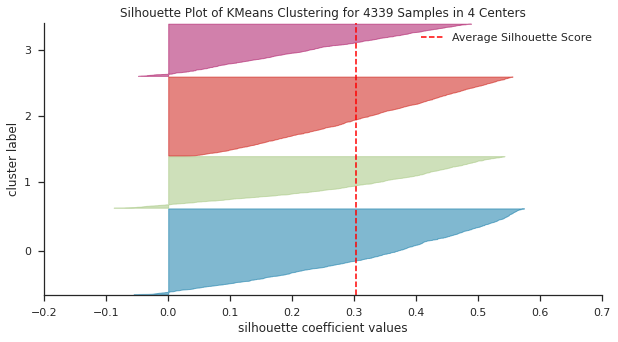

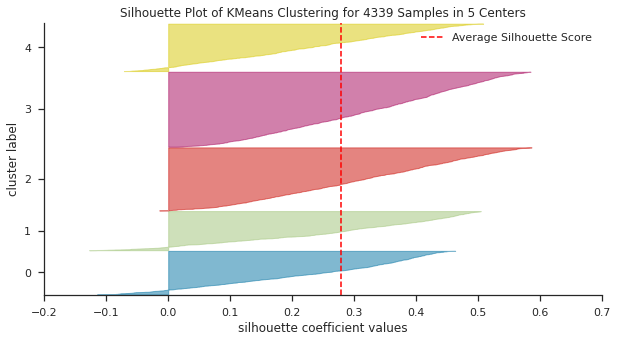

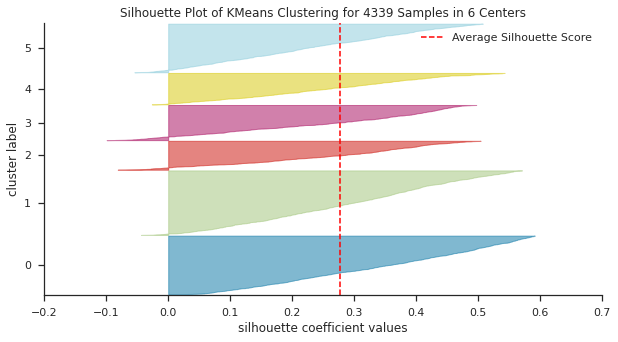

In [ ]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (10, 5))
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

# K-Means (2 Clusters)

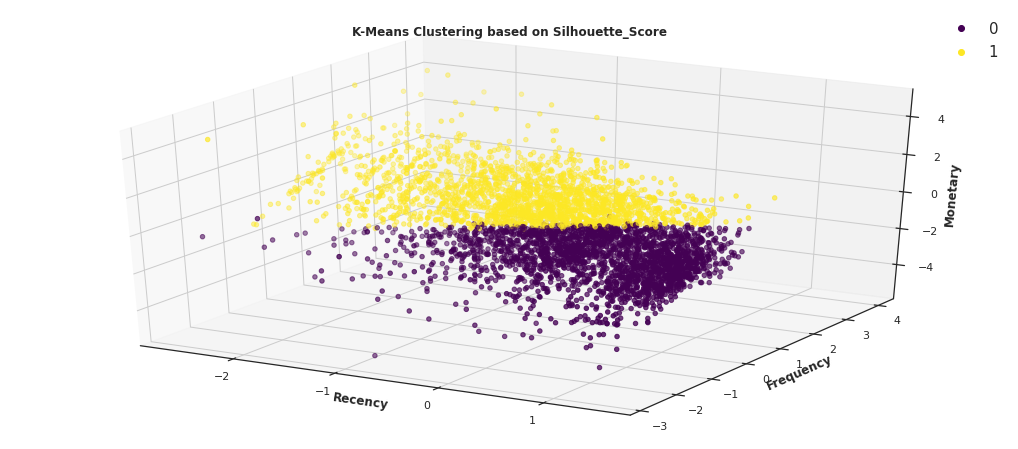

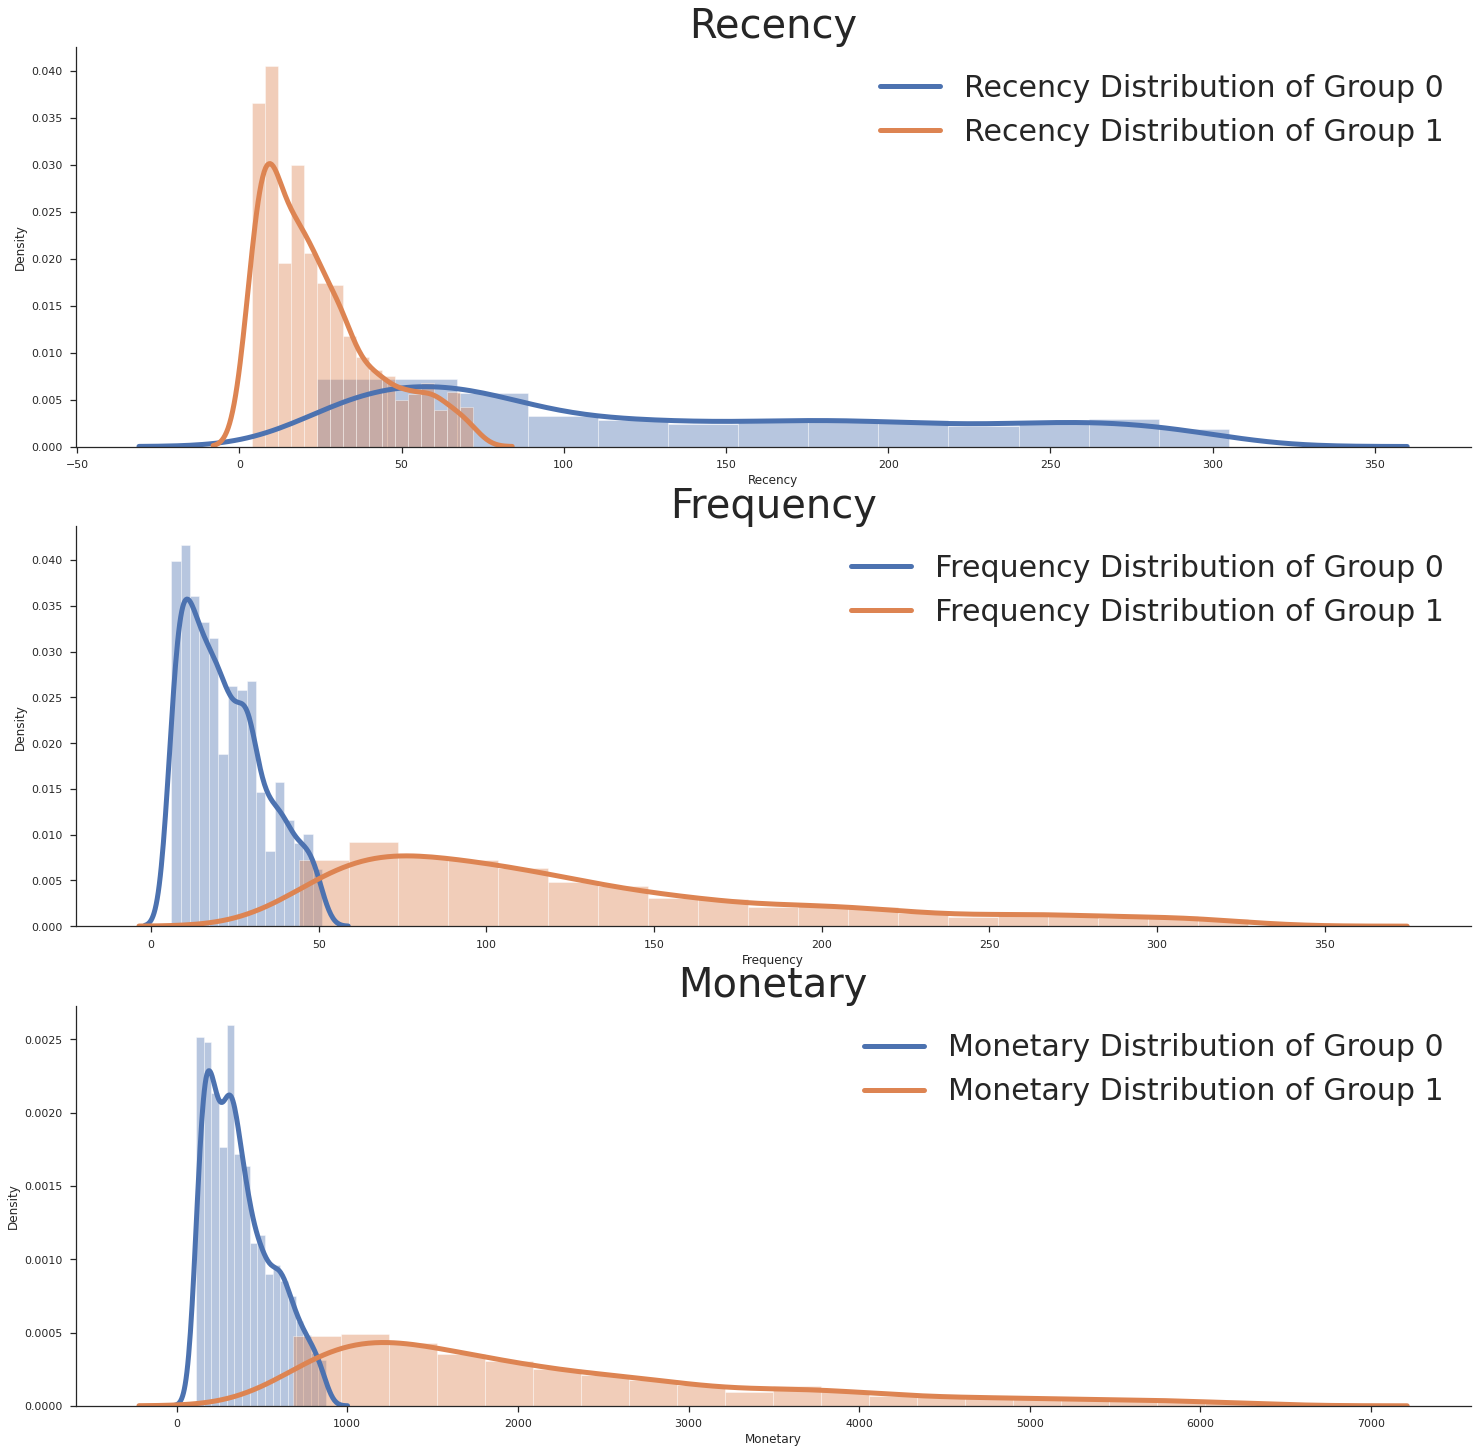

K-Means|2Cluster                      Visited                  Brought  \
0                 0  Visited 51 to 227  days ago   Bought 10 to 33  Times   
1                 1    Visited 8 to 39  days ago  Bought 67 to 192  Times   

                          Money Spent  
0    Spent Around 189 to 569 Sterling  
1  Spent Around 1068 to 3350 Sterling

In [ ]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")                                                  # Setting 2 Clusters
y_kmc = kmc.fit_predict(X)                                                  # FItting the model
centers = kmc.cluster_centers_                                              # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'                      # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|2Cluster']=plotc(y_kmc,title,'K-Means|2Cluster',0.1)

# K-Means (3 Clusters)

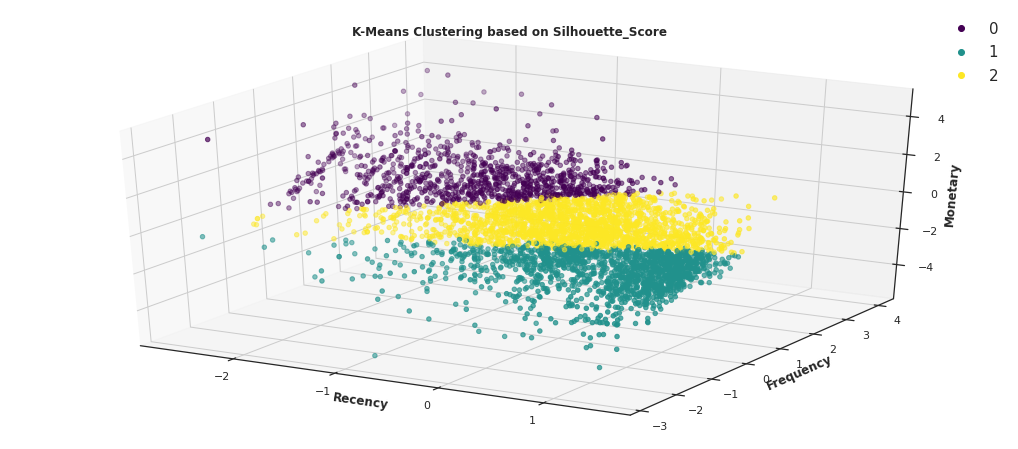

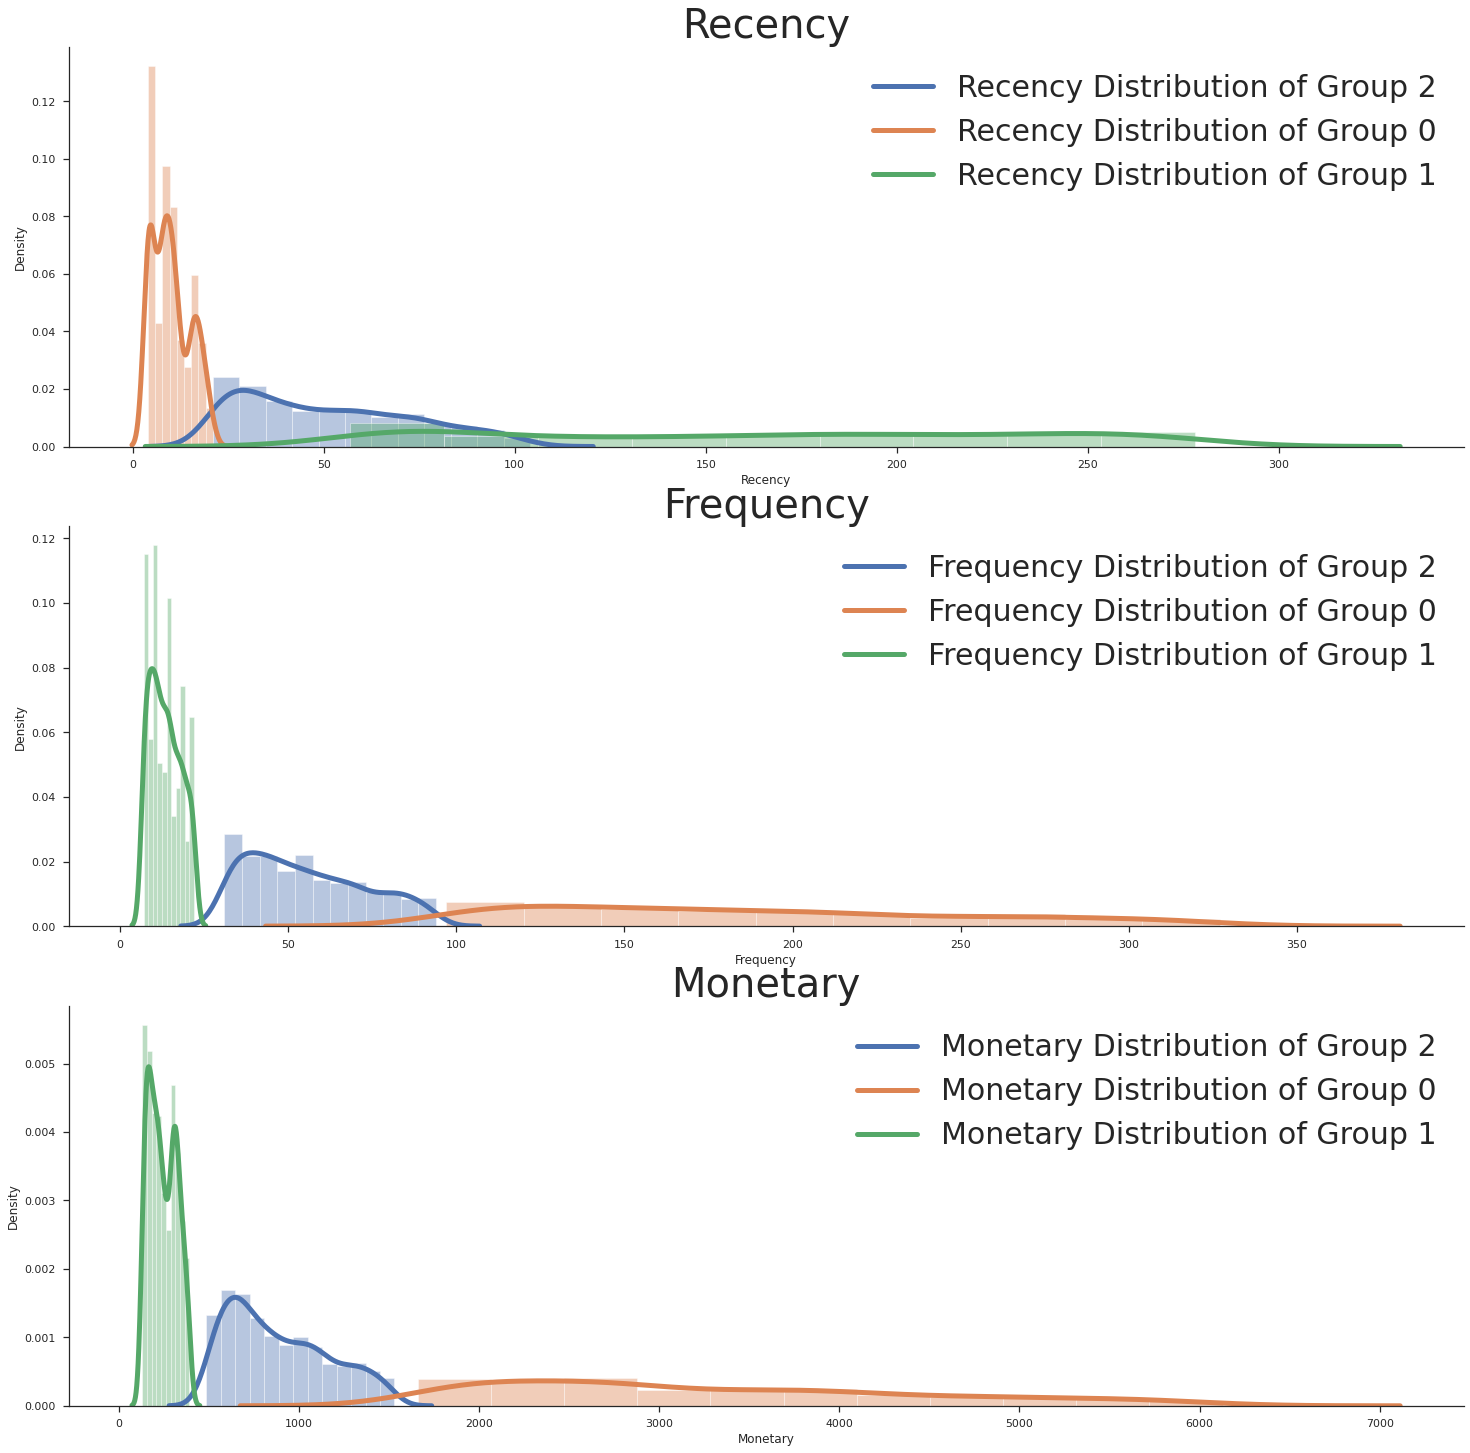

K-Means|3Cluster                      Visited                   Brought  \
0                 0    Visited 3 to 18  days ago  Bought 106 to 292  Times   
1                 1  Visited 65 to 263  days ago     Bought 7 to 21  Times   
2                 2   Visited 23 to 87  days ago    Bought 34 to 84  Times   

                          Money Spent  
0  Spent Around 1865 to 5209 Sterling  
1    Spent Around 147 to 357 Sterling  
2   Spent Around 547 to 1348 Sterling

In [ ]:
# Fitting the model on n_clusters = 3 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=3,init="k-means++")                                                      # Setting 3 Clusters
y_kmc = kmc.fit_predict(X)                                                      # Fitting the model
centers = kmc.cluster_centers_                                                  # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'                          # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|3Cluster']=plotc(y_kmc,title,'K-Means|3Cluster',0.2)

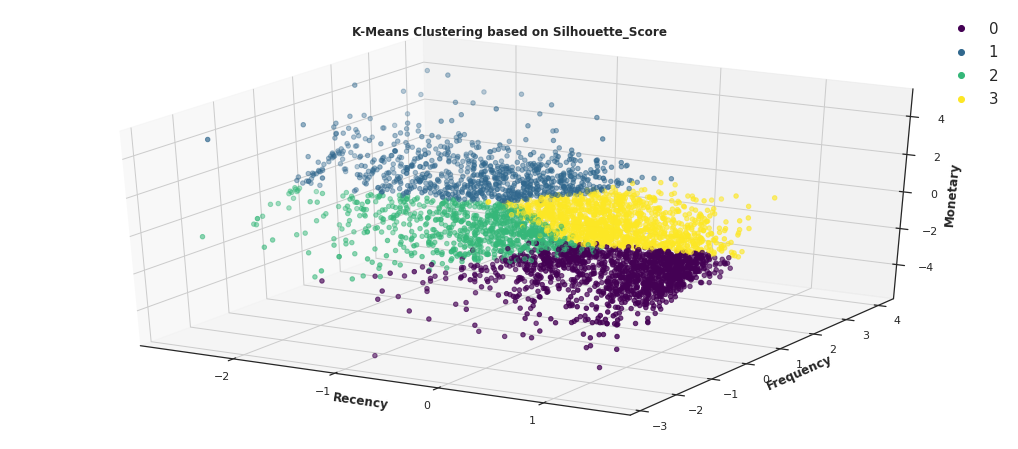

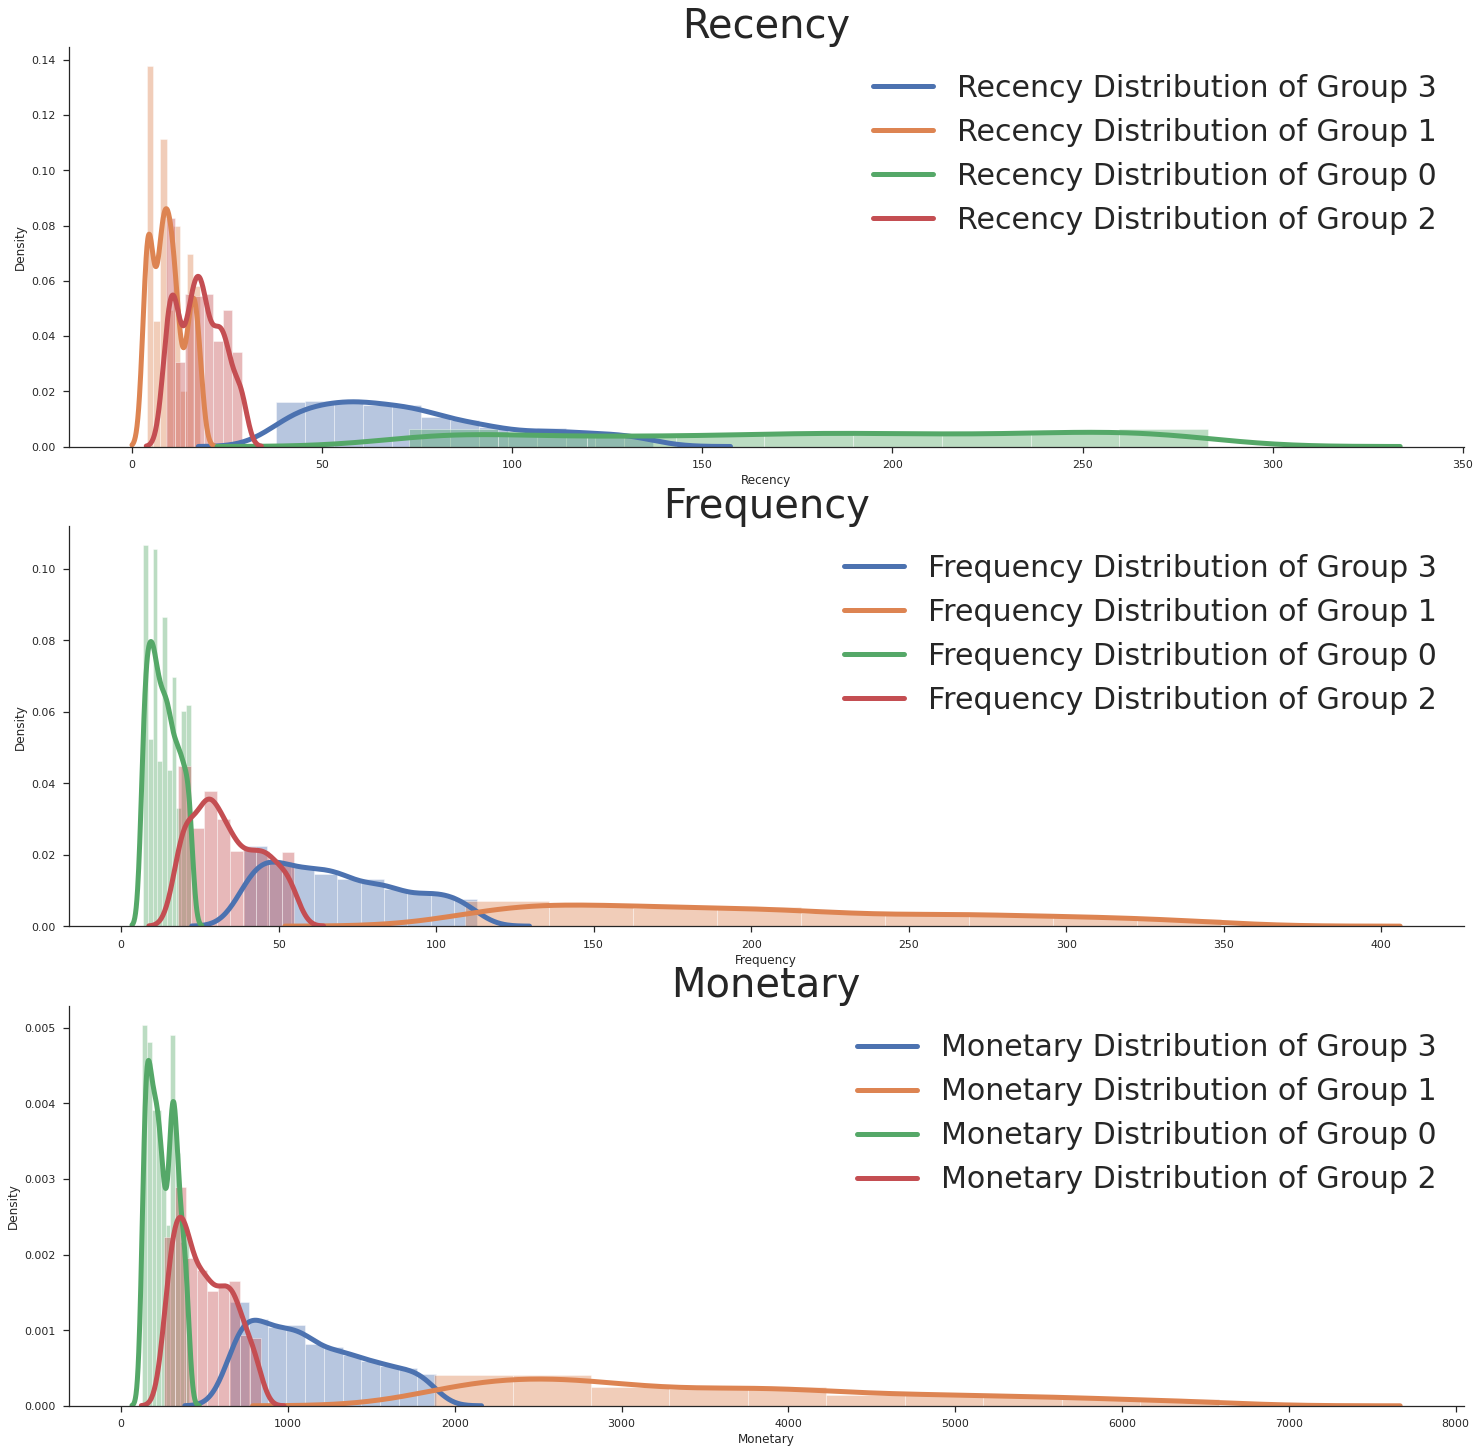

K-Means|4Cluster                      Visited                   Brought  \
0                 0  Visited 81 to 268  days ago     Bought 7 to 21  Times   
1                 1    Visited 4 to 17  days ago  Bought 120 to 309  Times   
2                 2    Visited 9 to 28  days ago    Bought 20 to 52  Times   
3                 3  Visited 43 to 120  days ago   Bought 42 to 103  Times   

                          Money Spent  
0    Spent Around 144 to 368 Sterling  
1  Spent Around 2071 to 5609 Sterling  
2    Spent Around 293 to 744 Sterling  
3   Spent Around 709 to 1706 Sterling

In [ ]:
# Fitting the model on n_clusters = 4 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")                                                  # Setting 4 Clusters
y_kmc = kmc.fit_predict(X)                                                  # FItting the model
centers = kmc.cluster_centers_                                              # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'                      # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|4Cluster']=plotc(y_kmc,title,'K-Means|4Cluster',0.2)

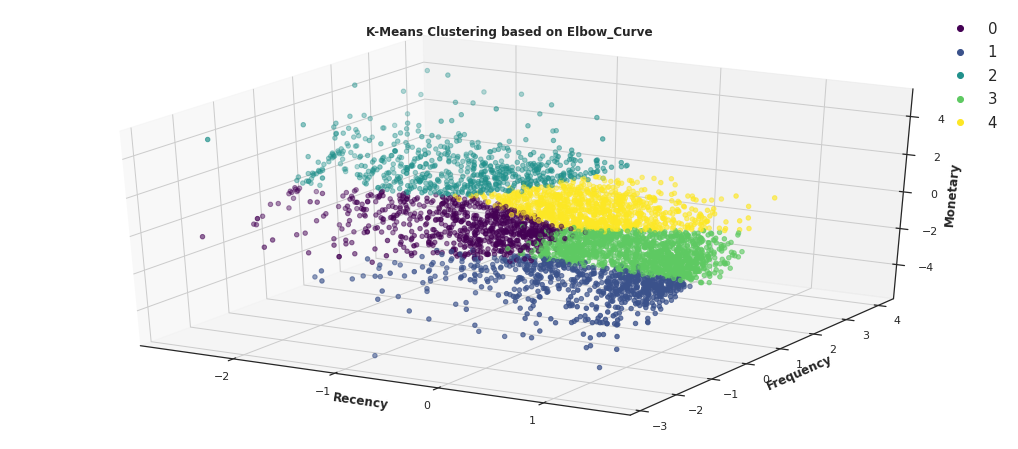

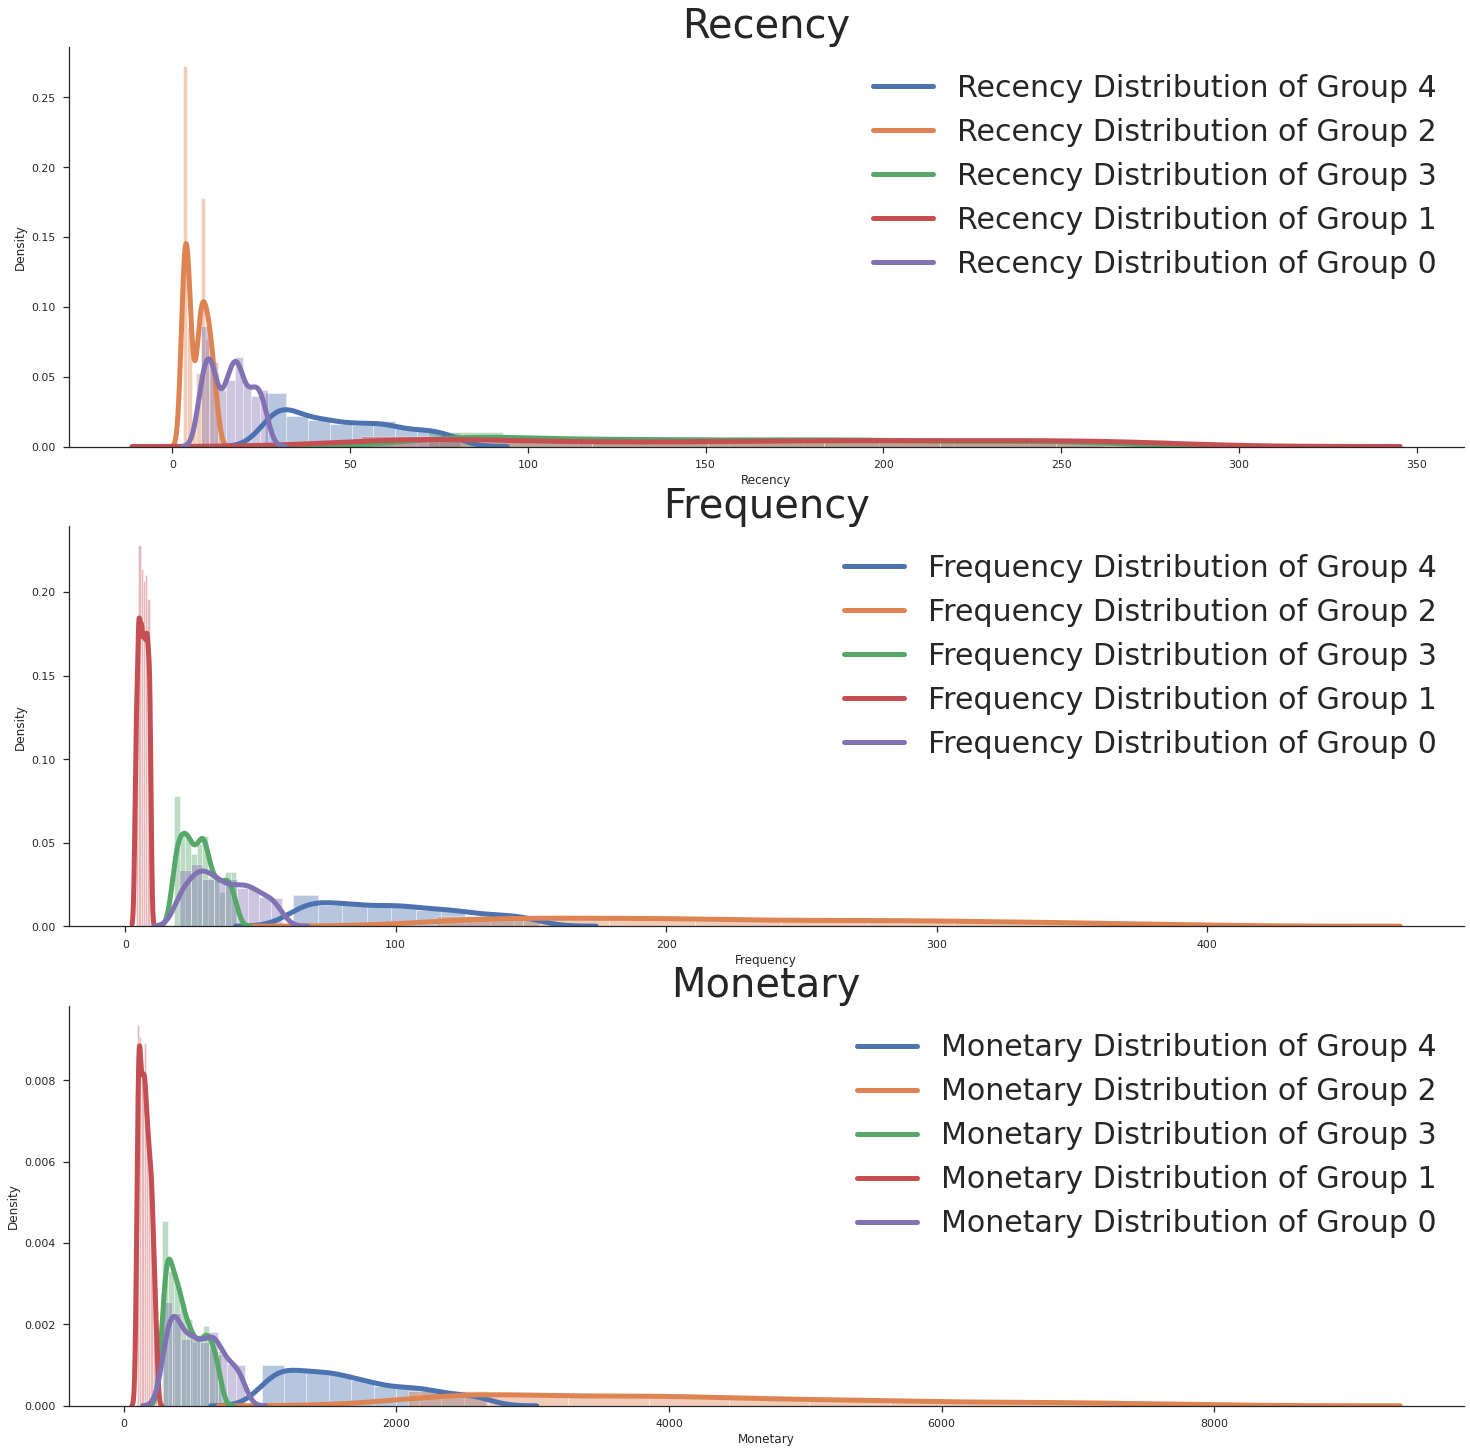

K-Means|5Cluster                      Visited                   Brought  \
0                 0    Visited 8 to 25  days ago    Bought 20 to 53  Times   
1                 1  Visited 61 to 264  days ago     Bought 4 to 10  Times   
2                 2    Visited 3 to 11  days ago  Bought 129 to 347  Times   
3                 3  Visited 77 to 243  days ago    Bought 18 to 38  Times   
4                 4   Visited 28 to 73  days ago   Bought 66 to 140  Times   

                          Money Spent  
0    Spent Around 325 to 802 Sterling  
1    Spent Around 104 to 216 Sterling  
2  Spent Around 2338 to 6686 Sterling  
3    Spent Around 305 to 642 Sterling  
4  Spent Around 1097 to 2379 Sterling

In [ ]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5,init="k-means++")                                                  # Setting 5 Clusters
y_kmc = kmc.fit_predict(X)                                                  # FItting the model
centers = kmc.cluster_centers_                                              # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'                      # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['K-Means|5Cluster']=plotc(y_kmc,title,'K-Means|5Cluster',0.2)

## Heirarchical Clustering 

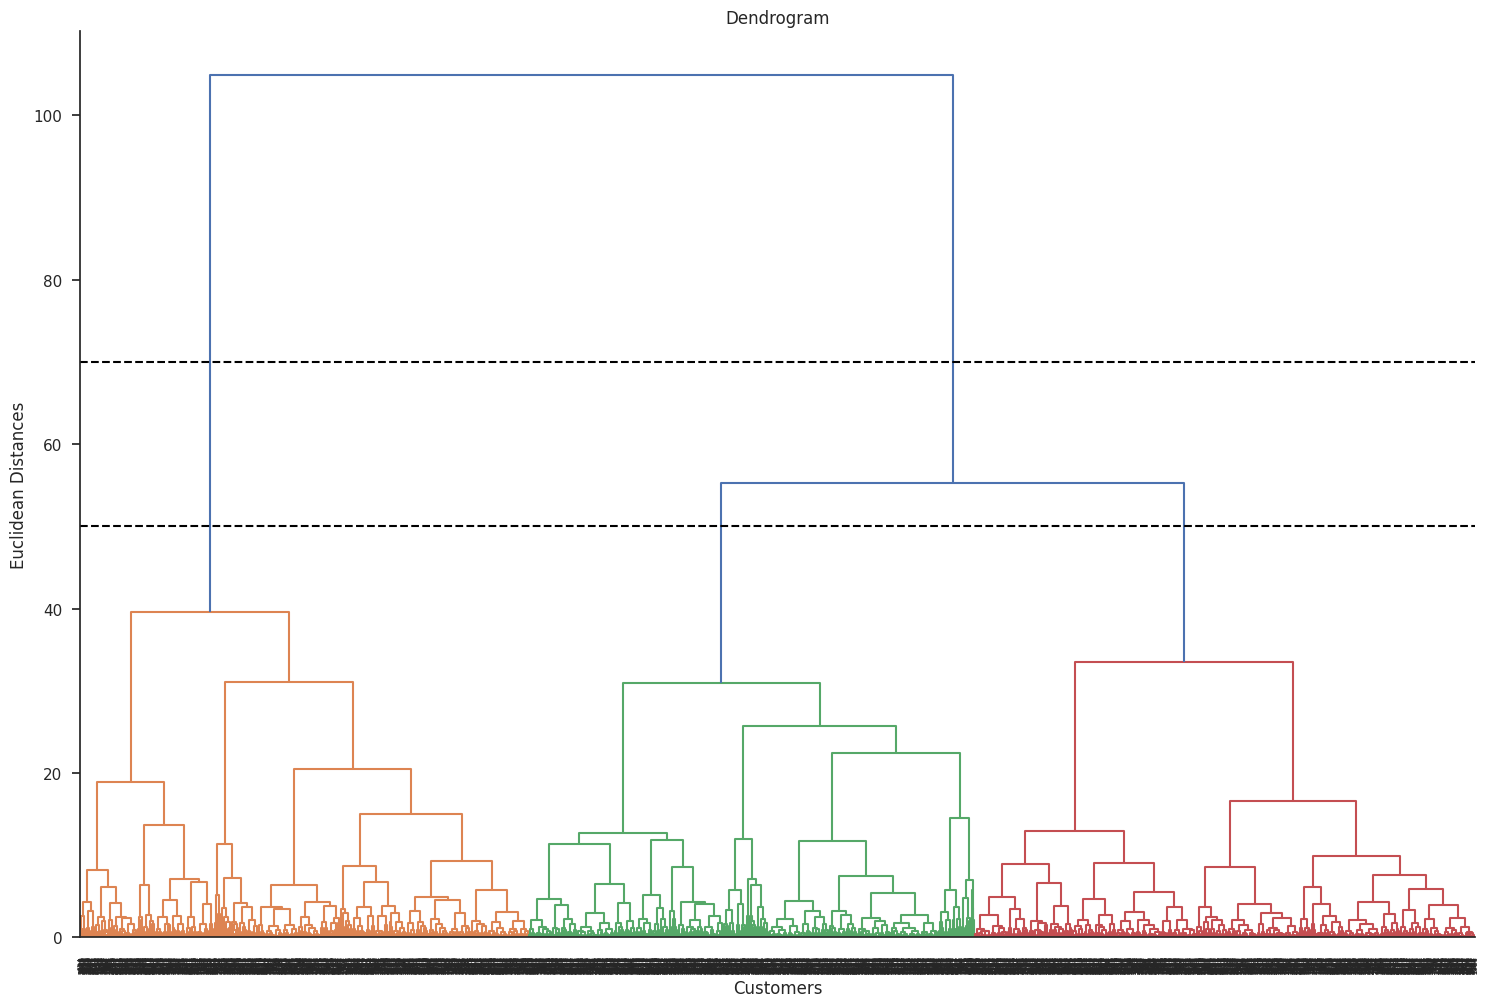

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(18,12), dpi=100)                        # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=70, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=50, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

Interpretation:
1. We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.
2. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.

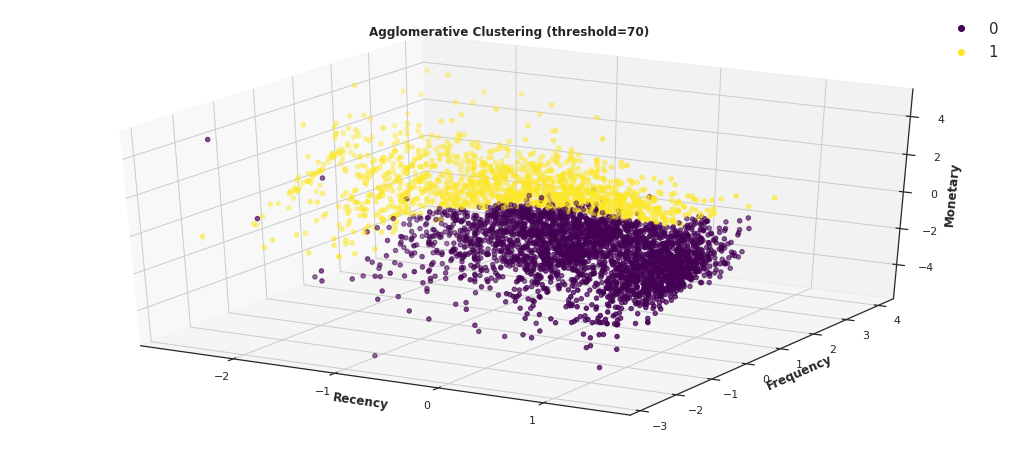

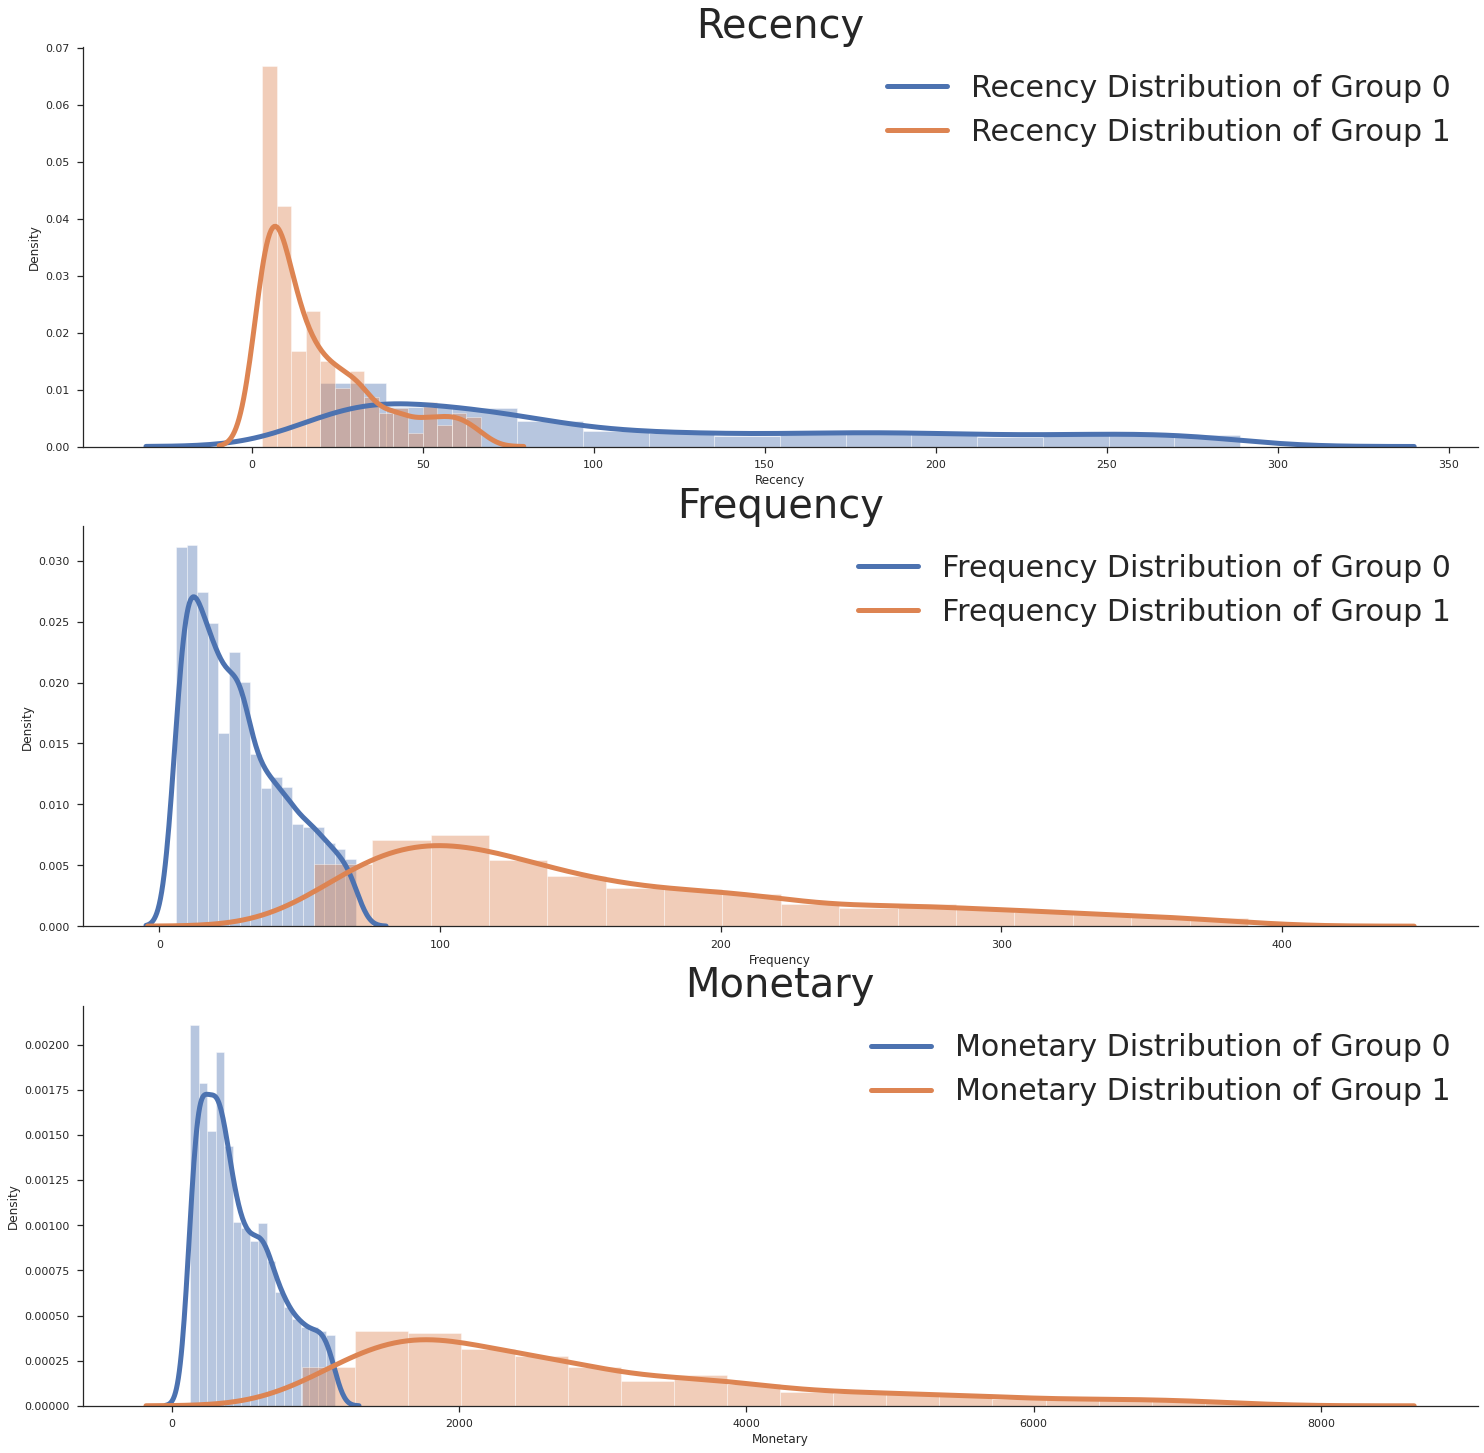

hierarchical|2Cluster                      Visited  \
0                      0  Visited 36 to 200  days ago   
1                      1    Visited 4 to 33  days ago   

                   Brought                         Money Spent  
0   Bought 12 to 46  Times    Spent Around 219 to 739 Sterling  
1  Bought 87 to 233  Times  Spent Around 1546 to 4020 Sterling

In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # Initializing the model
y_ahc = ahc.fit_predict(X)                                                        # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'                                 # Setting the model

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['hierarchical|2Cluster']=plotc(y_ahc,title,'hierarchical|2Cluster',0.1)

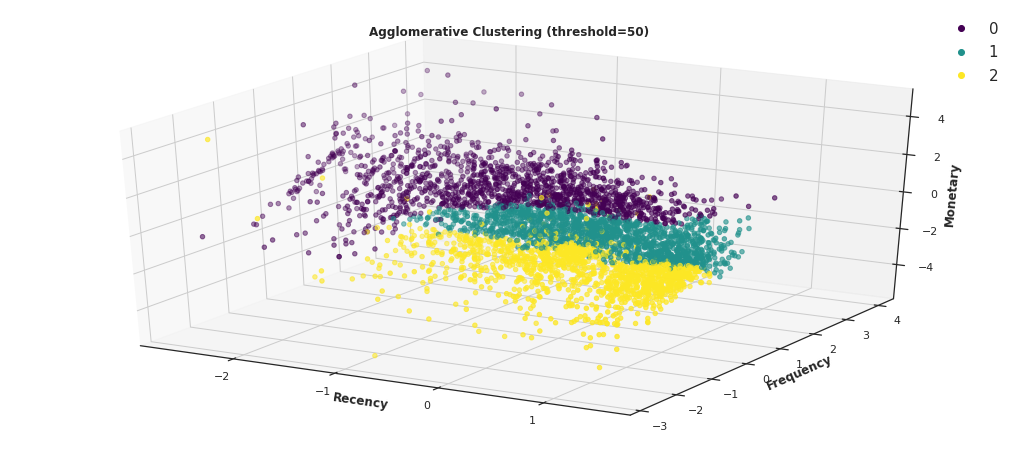

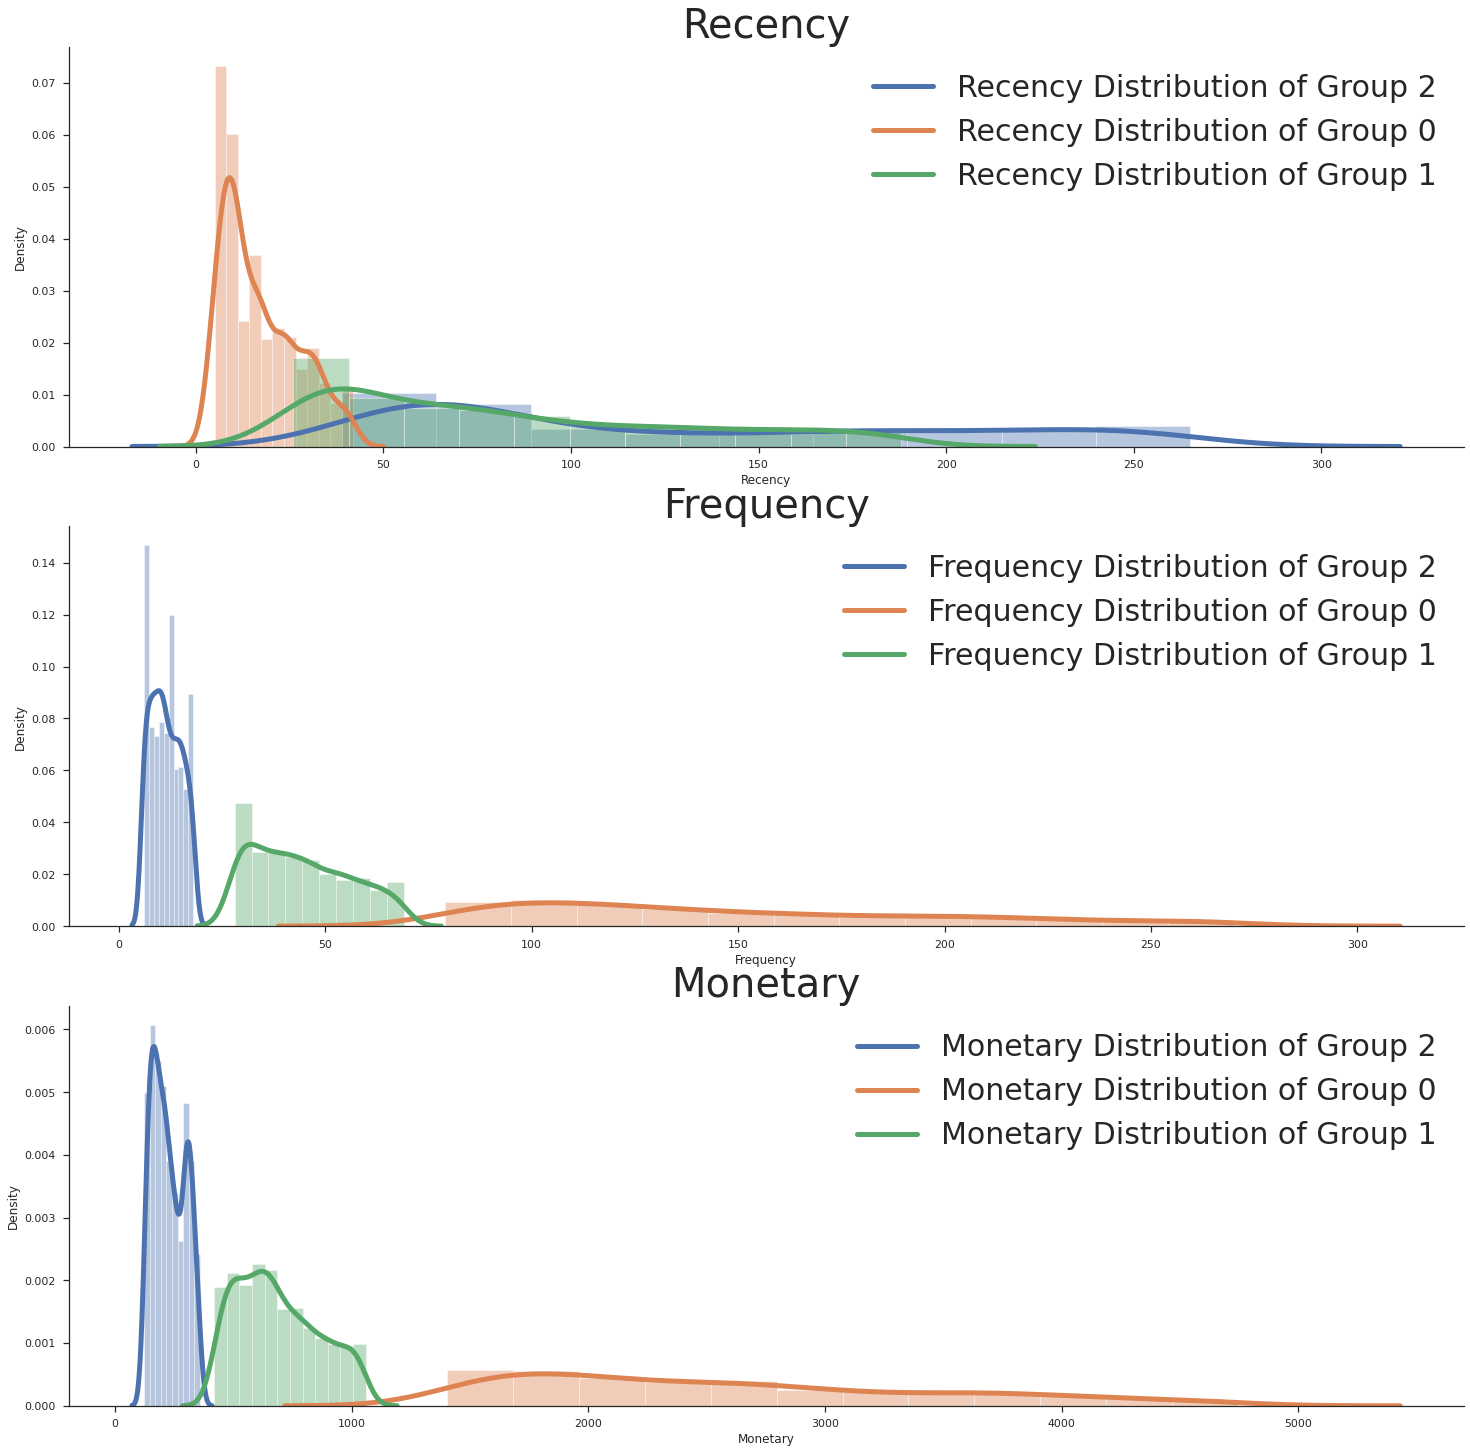

hierarchical|3Cluster                      Visited  \
0                      0    Visited 4 to 33  days ago   
1                      1  Visited 30 to 163  days ago   
2                      2  Visited 49 to 243  days ago   

                   Brought                         Money Spent  
0  Bought 87 to 233  Times  Spent Around 1546 to 4020 Sterling  
1   Bought 29 to 63  Times    Spent Around 463 to 977 Sterling  
2    Bought 6 to 18  Times    Spent Around 139 to 327 Sterling

In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')   # Initializing model with 3 clusters
y_ahc = ahc.fit_predict(X)                                                        # FItting the model

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'                                   # Setting the title

# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['hierarchical|3Cluster']=plotc(y_ahc,title,'hierarchical|3Cluster',0.2)  

# DBSCAN Clustering 

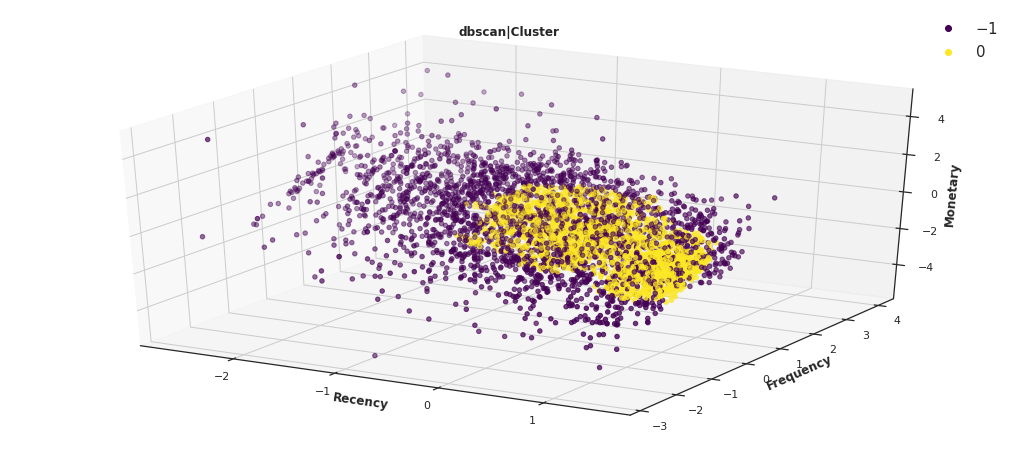

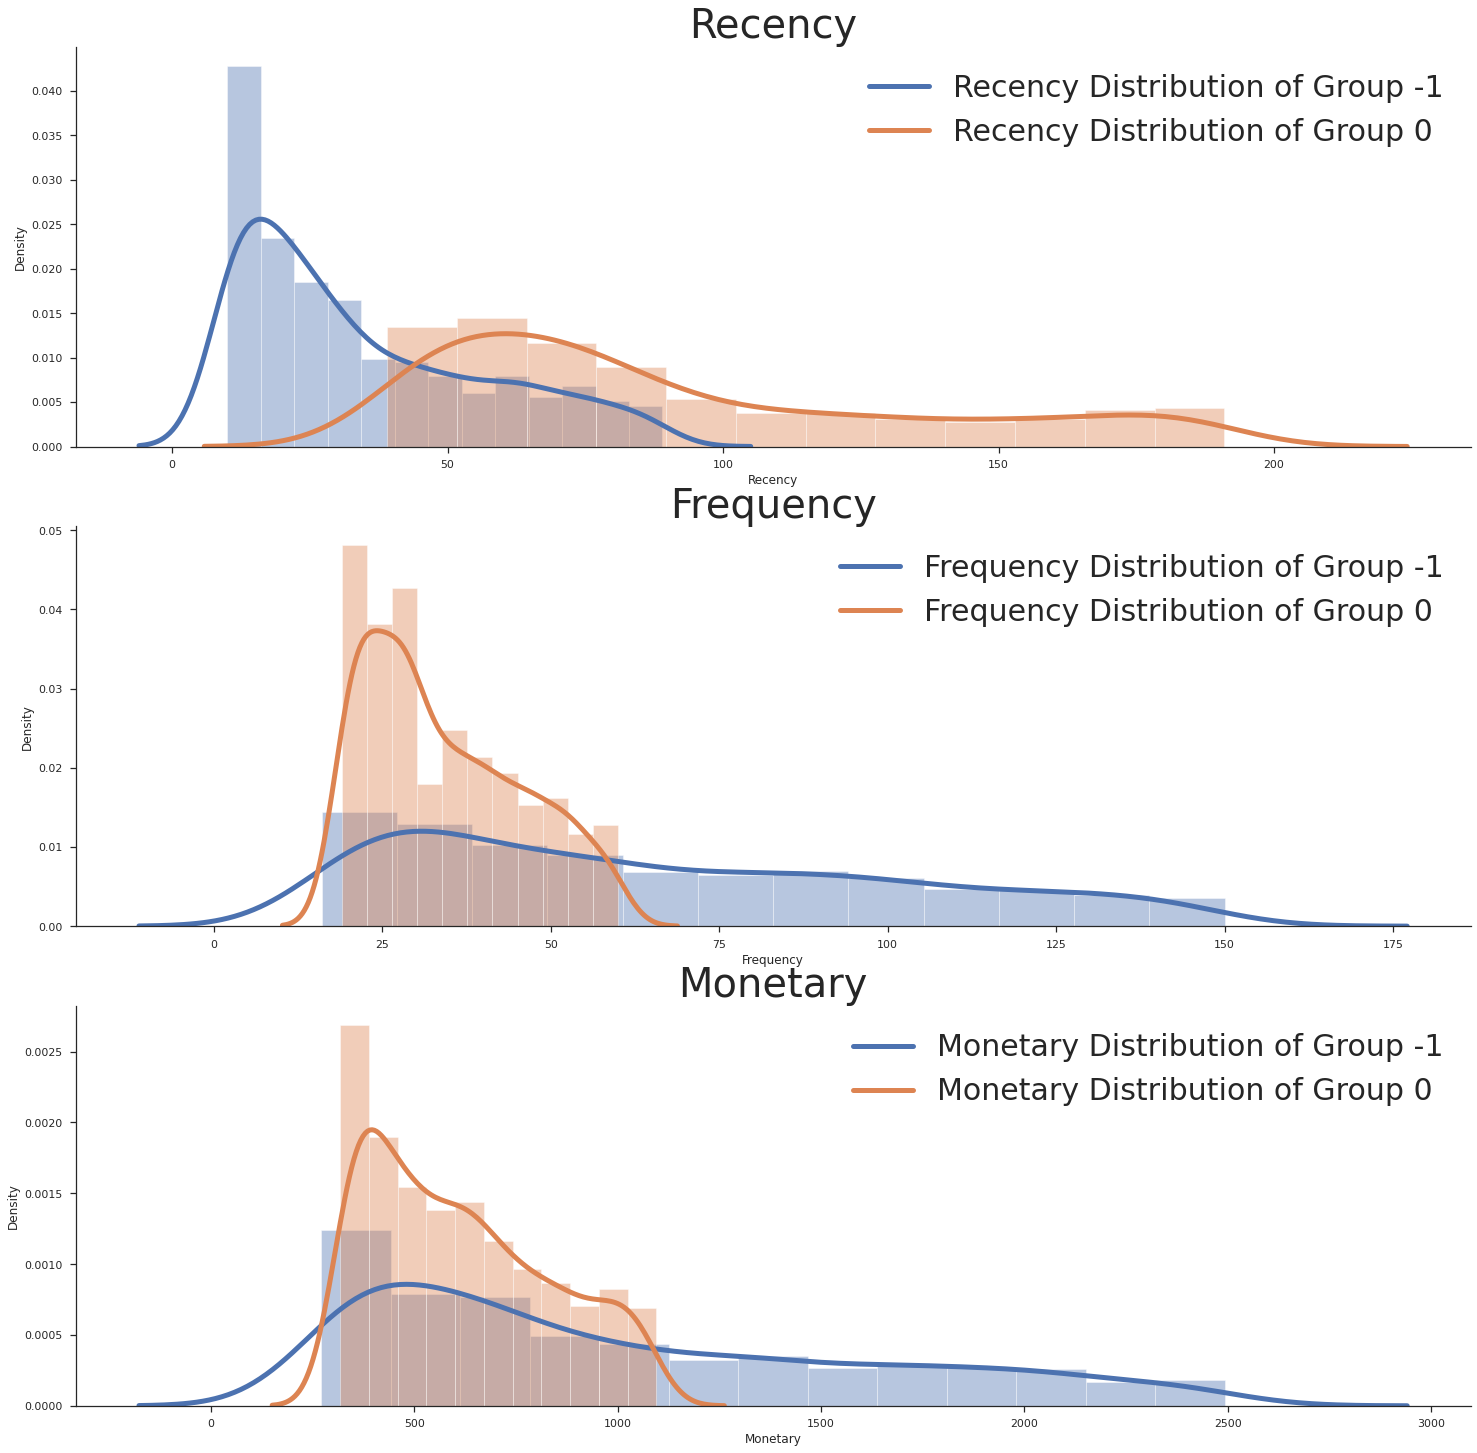

DBSCAN Clustering                      Visited                  Brought  \
0                 -1    Visited 9 to 90  days ago  Bought 15 to 151  Times   
1                  0  Visited 38 to 192  days ago   Bought 18 to 60  Times   

                         Money Spent  
0  Spent Around 270 to 2495 Sterling  
1  Spent Around 317 to 1097 Sterling

In [ ]:

# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.25, min_samples=30)              #
y = dbsc.fit_predict(X)                             # Fitting the model
title = 'DBSCAN Clustering'  
# PLotting the distribution of RFM and printing the stats of groups and its  conclusion
conclusion['dbscan|Cluster'] = plotc(y, 'dbscan|Cluster', title, 0.25)

In [ ]:
# Summarizing the results obtained by clustering using various methods
summary = pd.DataFrame({"Clusterer": ['Binning','Quantile Cut', "K-Means", "K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['RFM Score Binning', 'RFM Quantile Cut', 'Elbow Curve', 'Silhouette Score','Elbow Curve & Silhouette Score',
                                      'Dendogram (y=70)', 'Dendogram (y=50)', 'eps=0.2, min_samples=25'],
                        "Segments" : [4,4,5,2,4,2,3,4]},
                        index=['', '', '', '', '', '', '', ''])
summary.T

\
Clusterer            Binning      Quantile Cut      K-Means           K-Means   
Criterion  RFM Score Binning  RFM Quantile Cut  Elbow Curve  Silhouette Score   
Segments                   4                 4            5                 2   

                                                                               \
Clusterer                         K-Means     Agglomerative     Agglomerative   
Criterion  Elbow Curve & Silhouette Score  Dendogram (y=70)  Dendogram (y=50)   
Segments                                4                 2                 3   

                                    
Clusterer                   DBSCAN  
Criterion  eps=0.2, min_samples=25  
Segments                         4

# Conclusion


## 1.   Binning_Segment_ (4 Clusters)
## 2.   QuantileCut________(4 Clusters)
## 3.   K-Means___________(2 Cluster)
## 4.   K-Means___________(3 Cluster)
## 5.   K-Means___________(4 Cluster)
## 6.   K-Means___________(5 Cluster)
## 7.   hierarchical________(2 Cluster)
## 8.   hierarchical________(3 Cluster)
## 9.   DBSCAN_______________(4 Clusters)

# NOTE ALL THE VALUES SHOWN ARE APPROX!!
# **VALUES MIN AND MAX ARE TAKEN FROM 25th PERCENTILE and 75th PERCENTILE OF FEATURES RESPECTIVELY (IQR RANGE)** 


1. We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering .
3. We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the  algorithms and the statistics extracted from the data.
4. Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.




💔💔💔💔💔💔💔💔💔💔

# 1. Binning_Segment_ (4 Clusters)

In [ ]:

def printmd(string):
  '''
  col String : Type: String
  returns :MARKDOWN
  This functions allows us to print the output in the form of MarkDown 
  '''
  display(Markdown(string))
  
clusters_rank_list_={}
# Setting List of 5 types of customers based on activities of the customer
customers_type=["❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<br> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌",
                '🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <br>🥉🥉🥉🥉**AVERAGE CUSTOMERS**🥉🥉🥉🥉<br>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉',
                '❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤<br >❤❤❤**RECENTLY VISITED AVERAGE CUSTOMERS**❤❤❤<br> ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤',
                ' 🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <br> 🥈🥈🥈🥈 **GOOD CUSTOMERS** 🥈🥈🥈🥈 <br>     🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈',
                '💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <br> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <br>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓',
                "❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <br>❌❌ **LOSING LOYAL CUSTOMERS** ❌❌<br> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌",

                ]

customers_type_=["LOST POOR CUSTOMERS❌",
                'AVERAGE CUSTOMERS🥉',
                'RECENTLY VISITED AVERAGE CUSTOMERS❤',
                'GOOD CUSTOMERS🥈',
                'BEST CUSTOMERS💓',
                 'LOSING LOYAL CUSTOMERS❌'
                ]

In [ ]:
def printing_conclusion(dataframe,customer_type_order,segment_name):
  '''
  dataframe:dataframe that has conclusion of customers
  customer_type_order:List with order of stars given to customer to define customer type TYPE:list
  segment_name:Name of the clusters being passed TYPE:String
  Returns Conclusion of grouped customer based on clustering algorithm
  Features This functions returns the Conclusion of the grouped customers segmented from clustering algorithm 
  '''
  print(70*"__") 
  print(70*"__")
  # Iterating for loop over all the segments
  for id,i in enumerate(dataframe.index):
    print("")
    printmd(f"""<font size="4"  align="center" > <b>{segment_name} {i}:</b> Customers <b>{dataframe.loc[i,'Visited']} </b>
          and <b>{dataframe.loc[i,'Brought']}</b> and 
           <b>{dataframe.loc[i,'Money Spent']}</b></font> <br><h1  align="center" > {customers_type[customer_type_order[id]]} <br></h1>""".upper())
    print(70*"__")
    print(70*"__")

In [ ]:
conclusion['Binning_Segment_'][1]

Visited                   Brought  \
Binning_Segment_                                                          
1                 Visited 93 to 274  days ago     Bought 7 to 20  Times   
2                 Visited 31 to 114  days ago    Bought 19 to 41  Times   
3                  Visited 16 to 65  days ago    Bought 46 to 98  Times   
4                   Visited 4 to 19  days ago  Bought 123 to 305  Times   

                                         Money Spent  
Binning_Segment_                                      
1                   Spent Around 142 to 335 Sterling  
2                   Spent Around 327 to 725 Sterling  
3                  Spent Around 717 to 1613 Sterling  
4                 Spent Around 2093 to 5398 Sterling

In [ ]:

# from IPython.display import Markdown, display
display(conclusion['Binning_Segment_'][1])

#Manually Rating stars for the groups of customer 
clusters_rank_list_["Binning_Segment_"]=[0,1,3,4]
# Storing the conclusion data frame into variable 
dataframe=conclusion['Binning_Segment_'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_["Binning_Segment_"],"Binning Segment")

Visited                   Brought  \
Binning_Segment_                                                          
1                 Visited 93 to 274  days ago     Bought 7 to 20  Times   
2                 Visited 31 to 114  days ago    Bought 19 to 41  Times   
3                  Visited 16 to 65  days ago    Bought 46 to 98  Times   
4                   Visited 4 to 19  days ago  Bought 123 to 305  Times   

                                         Money Spent  
Binning_Segment_                                      
1                   Spent Around 142 to 335 Sterling  
2                   Spent Around 327 to 725 Sterling  
3                  Spent Around 717 to 1613 Sterling  
4                 Spent Around 2093 to 5398 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>BINNING SEGMENT 1:</B> CUSTOMERS <B>VISITED 93 TO 274  DAYS AGO </B>
          AND <B>BOUGHT 7 TO 20  TIMES</B> AND 
           <B>SPENT AROUND 142 TO 335 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>BINNING SEGMENT 2:</B> CUSTOMERS <B>VISITED 31 TO 114  DAYS AGO </B>
          AND <B>BOUGHT 19 TO 41  TIMES</B> AND 
           <B>SPENT AROUND 327 TO 725 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR>🥉🥉🥉🥉**AVERAGE CUSTOMERS**🥉🥉🥉🥉<BR>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>BINNING SEGMENT 3:</B> CUSTOMERS <B>VISITED 16 TO 65  DAYS AGO </B>
          AND <B>BOUGHT 46 TO 98  TIMES</B> AND 
           <B>SPENT AROUND 717 TO 1613 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" >  🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR> 🥈🥈🥈🥈 **GOOD CUSTOMERS** 🥈🥈🥈🥈 <BR>     🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>BINNING SEGMENT 4:</B> CUSTOMERS <B>VISITED 4 TO 19  DAYS AGO </B>
          AND <B>BOUGHT 123 TO 305  TIMES</B> AND 
           <B>SPENT AROUND 2093 TO 5398 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 2. QuantileCut________(4 Clusters)

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['QuantileCut'][1])

#Manually Rating stars for the groups of customer 
clusters_rank_list_['QuantileCut']=[0,5,3,4]

# Storing the conclusion data frame into variable 
dataframe=conclusion['QuantileCut'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['QuantileCut'],"QuantileCut")

Visited  \
RFM Quantile Based Segmentation                                 
1                                Visited 166 to 286  days ago   
2                                  Visited 59 to 96  days ago   
3                                  Visited 23 to 39  days ago   
4                                   Visited 4 to 12  days ago   

                                                 Brought  \
RFM Quantile Based Segmentation                            
1                                  Bought 8 to 30  Times   
2                                 Bought 18 to 69  Times   
3                                Bought 28 to 118  Times   
4                                Bought 50 to 214  Times   

                                                       Money Spent  
RFM Quantile Based Segmentation                                     
1                                 Spent Around 156 to 486 Sterling  
2                                Spent Around 355 to 1301 Sterling  
3                                Spent Around 439 to 1887 Sterling  
4                                Spent Around 822 to 3849 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>QUANTILECUT 1:</B> CUSTOMERS <B>VISITED 166 TO 286  DAYS AGO </B>
          AND <B>BOUGHT 8 TO 30  TIMES</B> AND 
           <B>SPENT AROUND 156 TO 486 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>QUANTILECUT 2:</B> CUSTOMERS <B>VISITED 59 TO 96  DAYS AGO </B>
          AND <B>BOUGHT 18 TO 69  TIMES</B> AND 
           <B>SPENT AROUND 355 TO 1301 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌ **LOSING LOYAL CUSTOMERS** ❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>QUANTILECUT 3:</B> CUSTOMERS <B>VISITED 23 TO 39  DAYS AGO </B>
          AND <B>BOUGHT 28 TO 118  TIMES</B> AND 
           <B>SPENT AROUND 439 TO 1887 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" >  🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR> 🥈🥈🥈🥈 **GOOD CUSTOMERS** 🥈🥈🥈🥈 <BR>     🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>QUANTILECUT 4:</B> CUSTOMERS <B>VISITED 4 TO 12  DAYS AGO </B>
          AND <B>BOUGHT 50 TO 214  TIMES</B> AND 
           <B>SPENT AROUND 822 TO 3849 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 3. Conclusion for K-Means___________(2Cluster)

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|2Cluster'][1])

#Manually Rating stars for the groups of customer 
clusters_rank_list_['K-Means|2Cluster']=[4,0]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|2Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['K-Means|2Cluster'],"K-Means|2Cluster")

Visited                  Brought  \
K-Means|2Cluster                                                         
0                 Visited 51 to 227  days ago   Bought 10 to 33  Times   
1                   Visited 8 to 39  days ago  Bought 67 to 192  Times   

                                         Money Spent  
K-Means|2Cluster                                      
0                   Spent Around 189 to 569 Sterling  
1                 Spent Around 1068 to 3350 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|2CLUSTER 0:</B> CUSTOMERS <B>VISITED 51 TO 227  DAYS AGO </B>
          AND <B>BOUGHT 10 TO 33  TIMES</B> AND 
           <B>SPENT AROUND 189 TO 569 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|2CLUSTER 1:</B> CUSTOMERS <B>VISITED 8 TO 39  DAYS AGO </B>
          AND <B>BOUGHT 67 TO 192  TIMES</B> AND 
           <B>SPENT AROUND 1068 TO 3350 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 4. Conclusion K-Means___________(3Cluster)

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|3Cluster'][1])

#Manually Rating stars for the groups of customer 
clusters_rank_list_['K-Means|3Cluster']=[4,0,1]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|3Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['K-Means|3Cluster'],"K-Means|3Cluster")

Visited                   Brought  \
K-Means|3Cluster                                                          
0                   Visited 3 to 18  days ago  Bought 106 to 292  Times   
1                 Visited 65 to 263  days ago     Bought 7 to 21  Times   
2                  Visited 23 to 87  days ago    Bought 34 to 84  Times   

                                         Money Spent  
K-Means|3Cluster                                      
0                 Spent Around 1865 to 5209 Sterling  
1                   Spent Around 147 to 357 Sterling  
2                  Spent Around 547 to 1348 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|3CLUSTER 0:</B> CUSTOMERS <B>VISITED 3 TO 18  DAYS AGO </B>
          AND <B>BOUGHT 106 TO 292  TIMES</B> AND 
           <B>SPENT AROUND 1865 TO 5209 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|3CLUSTER 1:</B> CUSTOMERS <B>VISITED 65 TO 263  DAYS AGO </B>
          AND <B>BOUGHT 7 TO 21  TIMES</B> AND 
           <B>SPENT AROUND 147 TO 357 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|3CLUSTER 2:</B> CUSTOMERS <B>VISITED 23 TO 87  DAYS AGO </B>
          AND <B>BOUGHT 34 TO 84  TIMES</B> AND 
           <B>SPENT AROUND 547 TO 1348 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR>🥉🥉🥉🥉**AVERAGE CUSTOMERS**🥉🥉🥉🥉<BR>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 5. Conclusion K-Means___________(4 Cluster)

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|4Cluster'][1])

#Manually Rating stars for the groups of customer 
clusters_rank_list_['K-Means|4Cluster']=[4,0,5,1]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|4Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['K-Means|4Cluster'],"K-Means|4Cluster")


Visited                   Brought  \
K-Means|4Cluster                                                          
0                 Visited 81 to 268  days ago     Bought 7 to 21  Times   
1                   Visited 4 to 17  days ago  Bought 120 to 309  Times   
2                   Visited 9 to 28  days ago    Bought 20 to 52  Times   
3                 Visited 43 to 120  days ago   Bought 42 to 103  Times   

                                         Money Spent  
K-Means|4Cluster                                      
0                   Spent Around 144 to 368 Sterling  
1                 Spent Around 2071 to 5609 Sterling  
2                   Spent Around 293 to 744 Sterling  
3                  Spent Around 709 to 1706 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|4CLUSTER 0:</B> CUSTOMERS <B>VISITED 81 TO 268  DAYS AGO </B>
          AND <B>BOUGHT 7 TO 21  TIMES</B> AND 
           <B>SPENT AROUND 144 TO 368 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|4CLUSTER 1:</B> CUSTOMERS <B>VISITED 4 TO 17  DAYS AGO </B>
          AND <B>BOUGHT 120 TO 309  TIMES</B> AND 
           <B>SPENT AROUND 2071 TO 5609 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|4CLUSTER 2:</B> CUSTOMERS <B>VISITED 9 TO 28  DAYS AGO </B>
          AND <B>BOUGHT 20 TO 52  TIMES</B> AND 
           <B>SPENT AROUND 293 TO 744 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌ **LOSING LOYAL CUSTOMERS** ❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|4CLUSTER 3:</B> CUSTOMERS <B>VISITED 43 TO 120  DAYS AGO </B>
          AND <B>BOUGHT 42 TO 103  TIMES</B> AND 
           <B>SPENT AROUND 709 TO 1706 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR>🥉🥉🥉🥉**AVERAGE CUSTOMERS**🥉🥉🥉🥉<BR>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 6. Conclusion K-Means___________(5 Cluster)

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['K-Means|5Cluster'][1])

#Manually Rating stars for the groups of customer
clusters_rank_list_['K-Means|5Cluster']=[0,3,1,4,2]

# Storing the conclusion data frame into variable 
dataframe=conclusion['K-Means|5Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['K-Means|5Cluster'],"K-Means|5Cluster")

Visited                   Brought  \
K-Means|5Cluster                                                          
0                   Visited 8 to 25  days ago    Bought 20 to 53  Times   
1                 Visited 61 to 264  days ago     Bought 4 to 10  Times   
2                   Visited 3 to 11  days ago  Bought 129 to 347  Times   
3                 Visited 77 to 243  days ago    Bought 18 to 38  Times   
4                  Visited 28 to 73  days ago   Bought 66 to 140  Times   

                                         Money Spent  
K-Means|5Cluster                                      
0                   Spent Around 325 to 802 Sterling  
1                   Spent Around 104 to 216 Sterling  
2                 Spent Around 2338 to 6686 Sterling  
3                   Spent Around 305 to 642 Sterling  
4                 Spent Around 1097 to 2379 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|5CLUSTER 0:</B> CUSTOMERS <B>VISITED 8 TO 25  DAYS AGO </B>
          AND <B>BOUGHT 20 TO 53  TIMES</B> AND 
           <B>SPENT AROUND 325 TO 802 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|5CLUSTER 1:</B> CUSTOMERS <B>VISITED 61 TO 264  DAYS AGO </B>
          AND <B>BOUGHT 4 TO 10  TIMES</B> AND 
           <B>SPENT AROUND 104 TO 216 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" >  🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR> 🥈🥈🥈🥈 **GOOD CUSTOMERS** 🥈🥈🥈🥈 <BR>     🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|5CLUSTER 2:</B> CUSTOMERS <B>VISITED 3 TO 11  DAYS AGO </B>
          AND <B>BOUGHT 129 TO 347  TIMES</B> AND 
           <B>SPENT AROUND 2338 TO 6686 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR>🥉🥉🥉🥉**AVERAGE CUSTOMERS**🥉🥉🥉🥉<BR>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|5CLUSTER 3:</B> CUSTOMERS <B>VISITED 77 TO 243  DAYS AGO </B>
          AND <B>BOUGHT 18 TO 38  TIMES</B> AND 
           <B>SPENT AROUND 305 TO 642 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>K-MEANS|5CLUSTER 4:</B> CUSTOMERS <B>VISITED 28 TO 73  DAYS AGO </B>
          AND <B>BOUGHT 66 TO 140  TIMES</B> AND 
           <B>SPENT AROUND 1097 TO 2379 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤<BR >❤❤❤**RECENTLY VISITED AVERAGE CUSTOMERS**❤❤❤<BR> ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 7. Conclusion hierarchicals___________(2 Cluster)

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['hierarchical|2Cluster'][1])

#Manually Rating stars for the groups of customer
clusters_rank_list_['hierarchical|2Cluster']=[4,0]

# Storing the conclusion data frame into variable 
dataframe=conclusion['hierarchical|2Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['hierarchical|2Cluster'],'hierarchical|2Cluster')

Visited                  Brought  \
hierarchical|2Cluster                                                         
0                      Visited 36 to 200  days ago   Bought 12 to 46  Times   
1                        Visited 4 to 33  days ago  Bought 87 to 233  Times   

                                              Money Spent  
hierarchical|2Cluster                                      
0                        Spent Around 219 to 739 Sterling  
1                      Spent Around 1546 to 4020 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>HIERARCHICAL|2CLUSTER 0:</B> CUSTOMERS <B>VISITED 36 TO 200  DAYS AGO </B>
          AND <B>BOUGHT 12 TO 46  TIMES</B> AND 
           <B>SPENT AROUND 219 TO 739 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>HIERARCHICAL|2CLUSTER 1:</B> CUSTOMERS <B>VISITED 4 TO 33  DAYS AGO </B>
          AND <B>BOUGHT 87 TO 233  TIMES</B> AND 
           <B>SPENT AROUND 1546 TO 4020 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 8. Conclusion hierarchicals___________(3 Cluster)

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['hierarchical|3Cluster'][1])

#Manually Rating stars for the groups of customer
clusters_rank_list_['hierarchical|3Cluster']=[0,4,5]

# Storing the conclusion data frame into variable 
dataframe=conclusion['hierarchical|3Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['hierarchical|3Cluster'],'hierarchical|3Cluster')

Visited                  Brought  \
hierarchical|3Cluster                                                         
0                        Visited 4 to 33  days ago  Bought 87 to 233  Times   
1                      Visited 30 to 163  days ago   Bought 29 to 63  Times   
2                      Visited 49 to 243  days ago    Bought 6 to 18  Times   

                                              Money Spent  
hierarchical|3Cluster                                      
0                      Spent Around 1546 to 4020 Sterling  
1                        Spent Around 463 to 977 Sterling  
2                        Spent Around 139 to 327 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>HIERARCHICAL|3CLUSTER 0:</B> CUSTOMERS <B>VISITED 4 TO 33  DAYS AGO </B>
          AND <B>BOUGHT 87 TO 233  TIMES</B> AND 
           <B>SPENT AROUND 1546 TO 4020 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌❌**LOST POOR CUSTOMERS**❌❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>HIERARCHICAL|3CLUSTER 1:</B> CUSTOMERS <B>VISITED 30 TO 163  DAYS AGO </B>
          AND <B>BOUGHT 29 TO 63  TIMES</B> AND 
           <B>SPENT AROUND 463 TO 977 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR> 💓💓💓💓💓**BEST CUSTOMERS**💓💓💓💓💓  <BR>    💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓💓 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>HIERARCHICAL|3CLUSTER 2:</B> CUSTOMERS <B>VISITED 49 TO 243  DAYS AGO </B>
          AND <B>BOUGHT 6 TO 18  TIMES</B> AND 
           <B>SPENT AROUND 139 TO 327 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR>❌❌ **LOSING LOYAL CUSTOMERS** ❌❌<BR> ❌❌❌❌❌❌❌❌❌❌❌❌❌❌❌ <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


# 9. Conclusion DBSCAN Clustering  

In [ ]:
# Displaying the conclusion in dataframe
display(conclusion['dbscan|Cluster'][1])

#Manually Rating stars for the groups of customer
clusters_rank_list_['DBSCAN']=[3,1,4,2]

# Storing the conclusion data frame into variable 
dataframe=conclusion['dbscan|Cluster'][1]

# Printing the conclusion in the form of Markdown
printing_conclusion(dataframe,clusters_rank_list_['DBSCAN'],'dbscan|Cluster')

Visited                  Brought  \
DBSCAN Clustering                                                         
-1                   Visited 9 to 90  days ago  Bought 15 to 151  Times   
 0                 Visited 38 to 192  days ago   Bought 18 to 60  Times   

                                         Money Spent  
DBSCAN Clustering                                     
-1                 Spent Around 270 to 2495 Sterling  
 0                 Spent Around 317 to 1097 Sterling

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>DBSCAN|CLUSTER -1:</B> CUSTOMERS <B>VISITED 9 TO 90  DAYS AGO </B>
          AND <B>BOUGHT 15 TO 151  TIMES</B> AND 
           <B>SPENT AROUND 270 TO 2495 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" >  🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR> 🥈🥈🥈🥈 **GOOD CUSTOMERS** 🥈🥈🥈🥈 <BR>     🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈🥈 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________



<FONT SIZE="4"  ALIGN="CENTER" > <B>DBSCAN|CLUSTER 0:</B> CUSTOMERS <B>VISITED 38 TO 192  DAYS AGO </B>
          AND <B>BOUGHT 18 TO 60  TIMES</B> AND 
           <B>SPENT AROUND 317 TO 1097 STERLING</B></FONT> <BR><H1  ALIGN="CENTER" > 🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR>🥉🥉🥉🥉**AVERAGE CUSTOMERS**🥉🥉🥉🥉<BR>  🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉🥉 <BR></H1>

____________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________


In [ ]:
printmd("# **Segmented Customer Got from Cluster Analysis**")
final_conclusion_=pd.DataFrame()
for id,i in enumerate(clusters_rank_list_):
  _customer_segment=["Yes" if j in clusters_rank_list_[i] else "No" for j in range(6)]
  final_conclusion_[i]=pd.Series(_customer_segment,index=customers_type_)
final_conclusion_.T

# **Segmented Customer Got from Cluster Analysis**

LOST POOR CUSTOMERS❌ AVERAGE CUSTOMERS🥉  \
Binning_Segment_                       Yes                Yes   
QuantileCut                            Yes                 No   
K-Means|2Cluster                       Yes                 No   
K-Means|3Cluster                       Yes                Yes   
K-Means|4Cluster                       Yes                Yes   
K-Means|5Cluster                       Yes                Yes   
hierarchical|2Cluster                  Yes                 No   
hierarchical|3Cluster                  Yes                 No   
DBSCAN                                  No                Yes   

                      RECENTLY VISITED AVERAGE CUSTOMERS❤ GOOD CUSTOMERS🥈  \
Binning_Segment_                                       No             Yes   
QuantileCut                                            No             Yes   
K-Means|2Cluster                                       No              No   
K-Means|3Cluster                                       No              No   
K-Means|4Cluster                                       No              No   
K-Means|5Cluster                                      Yes             Yes   
hierarchical|2Cluster                                  No              No   
hierarchical|3Cluster                                  No              No   
DBSCAN                                                Yes             Yes   

                      BEST CUSTOMERS💓 LOSING LOYAL CUSTOMERS❌  
Binning_Segment_                  Yes                      No  
QuantileCut                       Yes                     Yes  
K-Means|2Cluster                  Yes                      No  
K-Means|3Cluster                  Yes                      No  
K-Means|4Cluster                  Yes                     Yes  
K-Means|5Cluster                  Yes                      No  
hierarchical|2Cluster             Yes                      No  
hierarchical|3Cluster             Yes                     Yes  
DBSCAN                            Yes                      No

<table>